## 1. Duomenų imties pažinimas

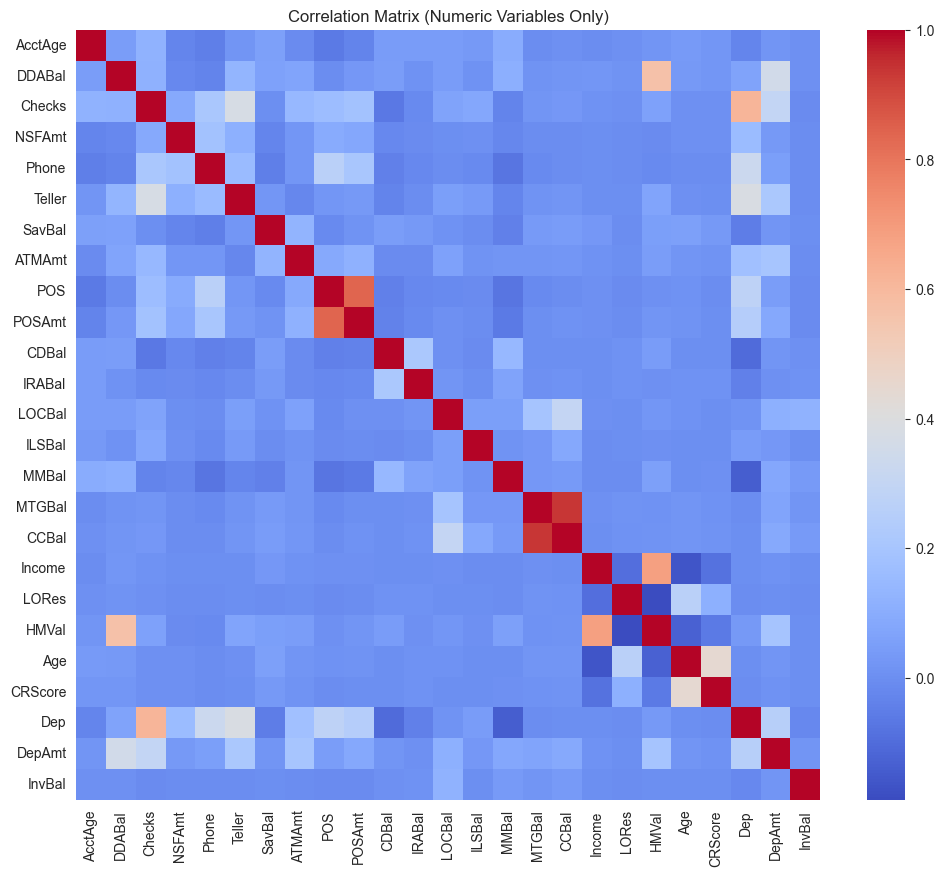

List of columns, their data types, and unique values (up to 5 values):
        Column Name Data Type  \
AcctAge     AcctAge   float64   
DDABal       DDABal   float64   
Checks       Checks     int64   
NSFAmt       NSFAmt   float64   
Phone         Phone     int64   
Teller       Teller     int64   
SavBal       SavBal   float64   
ATMAmt       ATMAmt   float64   
POS             POS     int64   
POSAmt       POSAmt   float64   
CDBal         CDBal     int64   
IRABal       IRABal   float64   
LOCBal       LOCBal   float64   
ILSBal       ILSBal   float64   
MMBal         MMBal   float64   
MTGBal       MTGBal   float64   
CCBal         CCBal   float64   
Income       Income     int64   
LORes         LORes   float64   
HMVal         HMVal     int64   
Age             Age     int64   
CRScore     CRScore     int64   
Dep             Dep     int64   
DepAmt       DepAmt   float64   
InvBal       InvBal   float64   

                                             Unique Values  
AcctAge  

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('../2 - Data/develop.csv')  # Adjust the path as necessary

# Identify object-type (categorical) columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Identify columns with only two unique values (assumed to be binary categorical)
binary_columns = [col for col in data.columns if data[col].nunique() <= 6]

# Combine both sets of columns to be removed
columns_to_remove = list(set(categorical_columns + binary_columns))

# Remove identified categorical and binary columns
data_numeric = data.drop(columns=columns_to_remove)

# Ensure only numeric data remains
data_numeric = data_numeric.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the correlation matrix as a heatmap (without numbers, only colors)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()

# Generate the list of columns, their data types, and unique values for `data_numeric`
columns_info = pd.DataFrame({
    'Column Name': data_numeric.columns,
    'Data Type': data_numeric.dtypes,
    'Unique Values': [data_numeric[col].unique()[:10] if data_numeric[col].nunique() > 10 else data_numeric[col].unique() for col in data_numeric.columns]  # Displaying up to 5 unique values for brevity
})

print("List of columns, their data types, and unique values (up to 5 values):")
print(columns_info)

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv("../2 - Data/develop.csv")


In [5]:
# Display basic statistics
print(data.describe(include='all'))


             AcctAge           DDA         DDABal        CashBk        Checks  \
count   32264.000000  32264.000000   32264.000000  32264.000000  32264.000000   
unique           NaN           NaN            NaN           NaN           NaN   
top              NaN           NaN            NaN           NaN           NaN   
freq             NaN           NaN            NaN           NaN           NaN   
mean        5.779804      0.815646    2170.016712      0.015962      4.259918   
std         6.329251      0.387779    7282.726998      0.131368      5.156643   
min         0.300000      0.000000    -774.830000      0.000000      0.000000   
25%         2.100000      1.000000      59.940000      0.000000      0.000000   
50%         3.900000      1.000000     571.820000      0.000000      2.000000   
75%         6.300000      1.000000    1834.232500      0.000000      7.000000   
max        61.500000      1.000000  278093.830000      4.000000     49.000000   

              DirDep       

In [3]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(data, title="Data Profiling Report", explorative=True)

# Save the report
profile.to_file("3 - Results/reydata-profiling.html")

/Users/zydrunasbautronis/Documents/KTU/202409 Vidiniu Verslo Duomenu Projektas/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 49.76it/s]



Class Distribution:
Ins
0    21089
1    11175
Name: count, dtype: int64


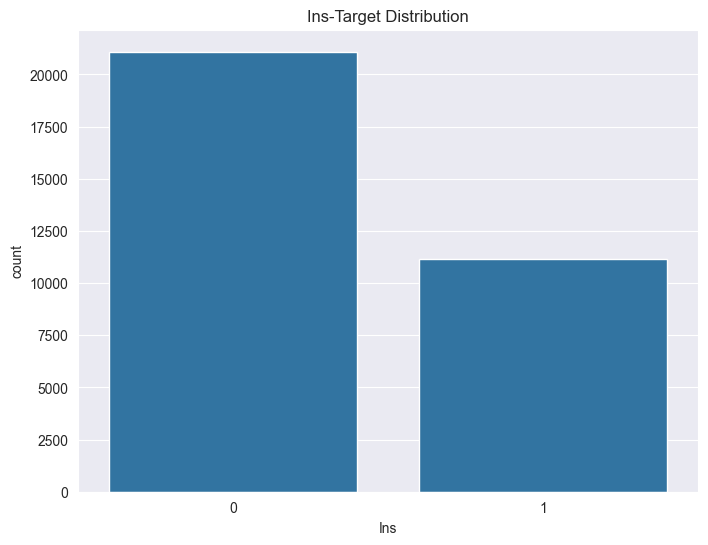

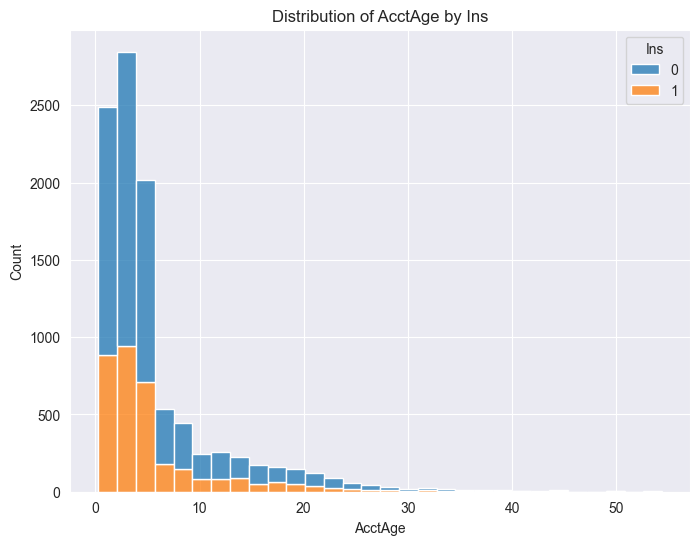

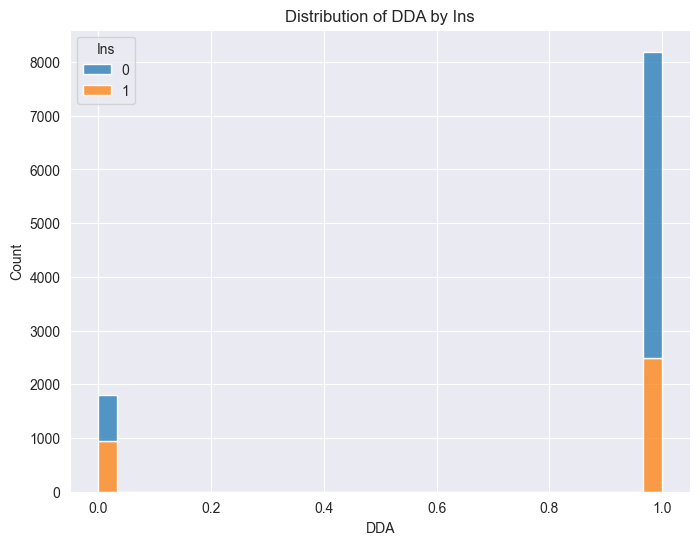

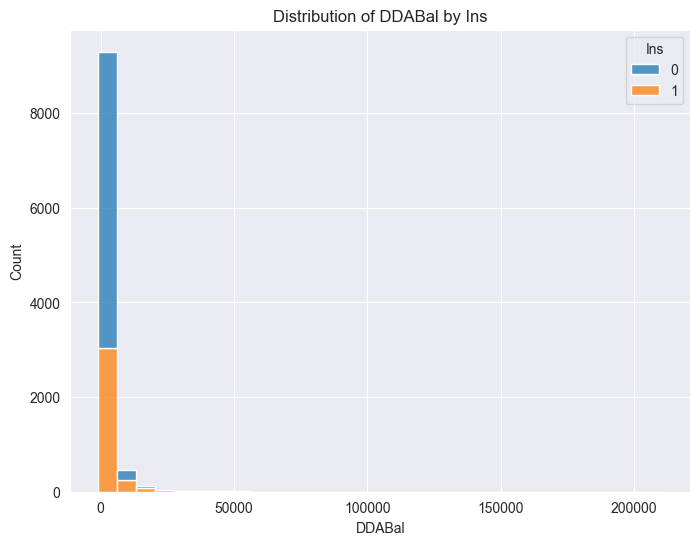

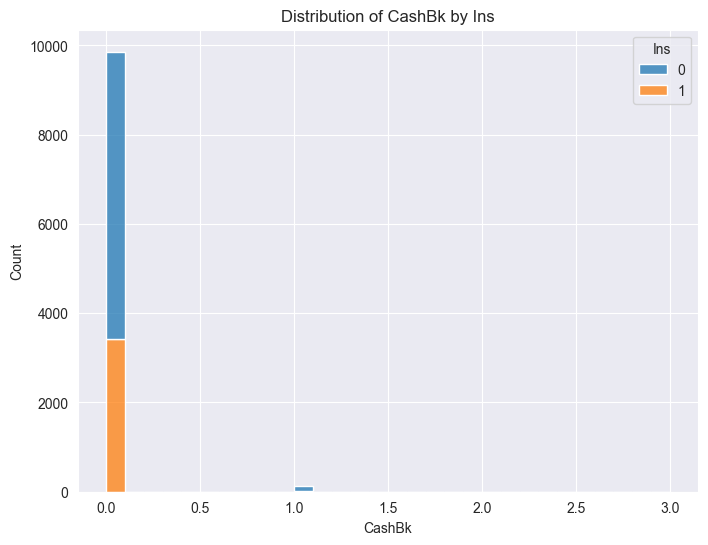

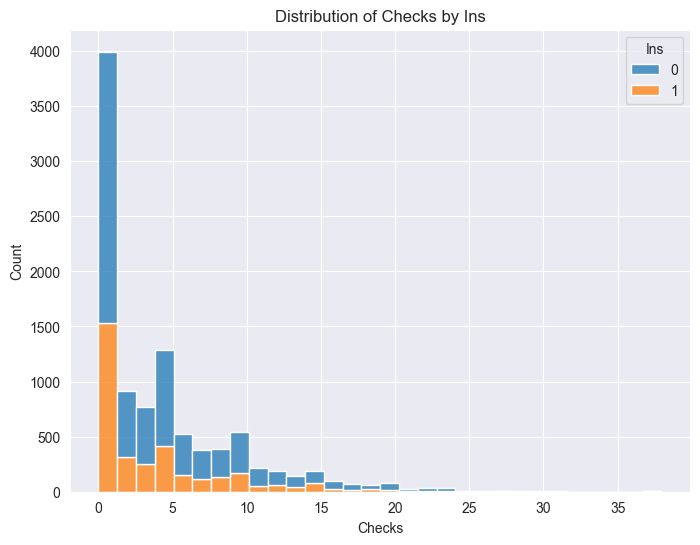

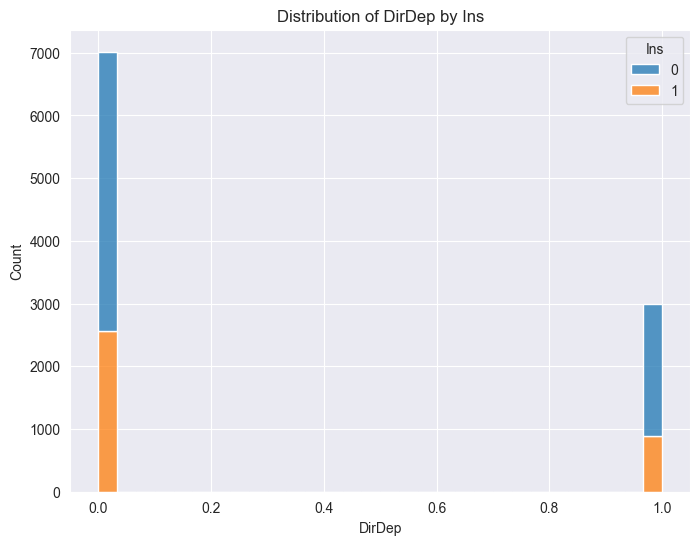

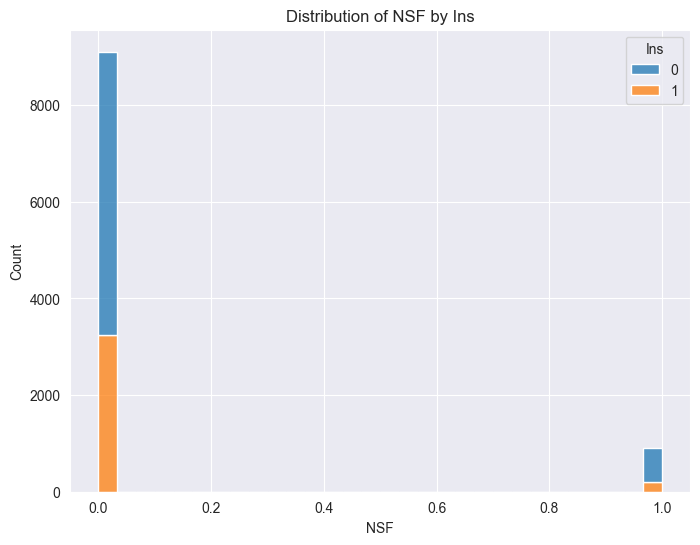

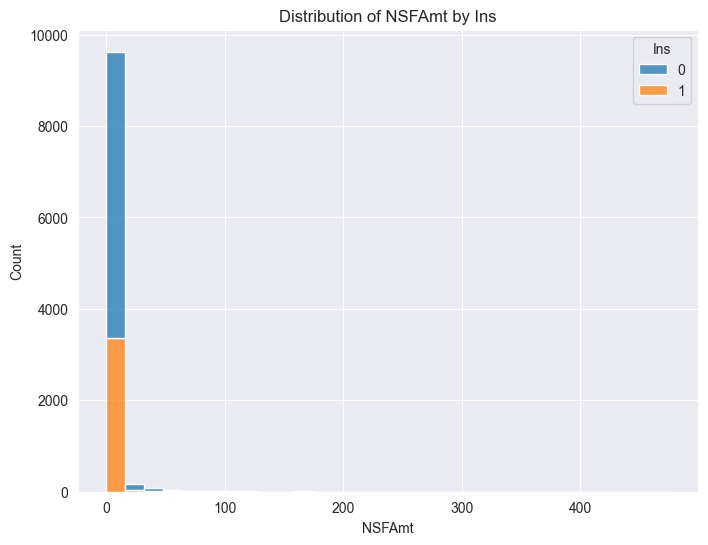

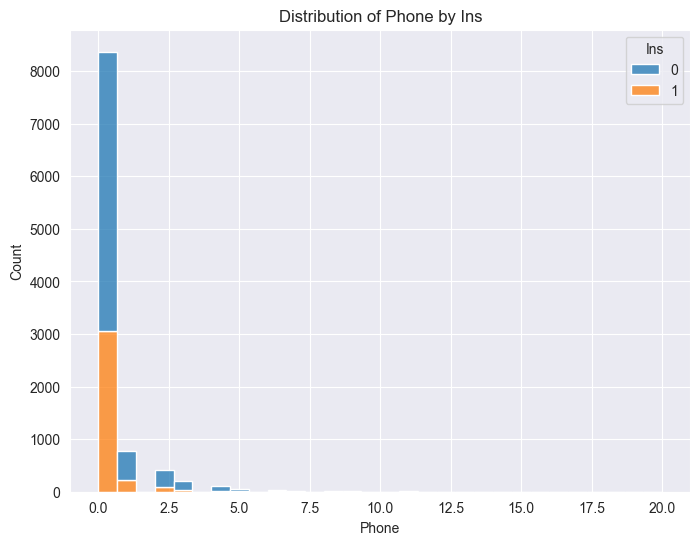

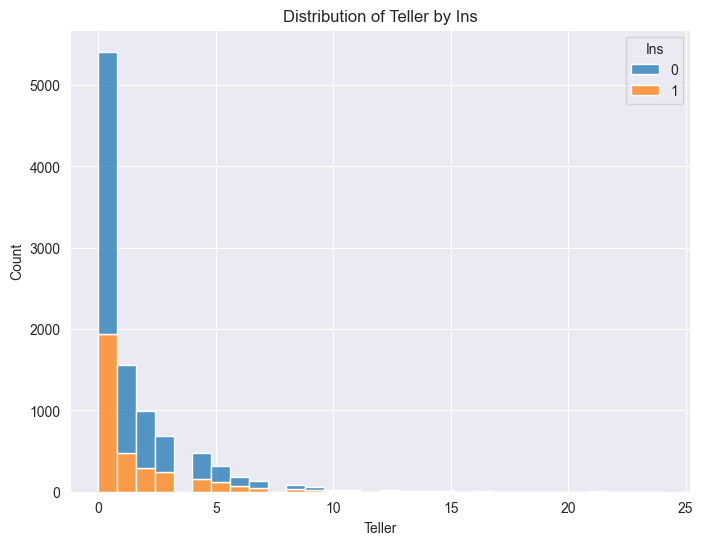

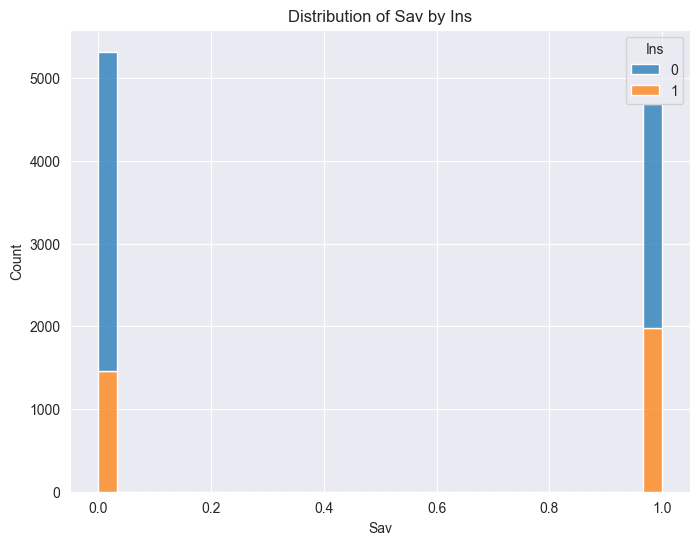

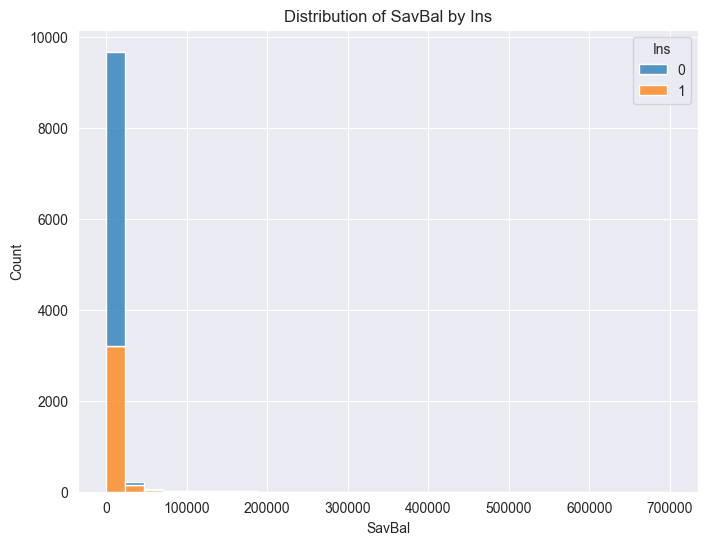

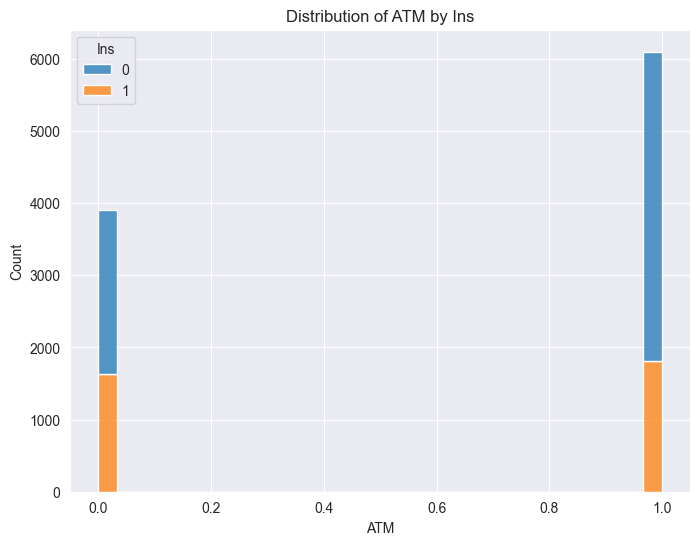

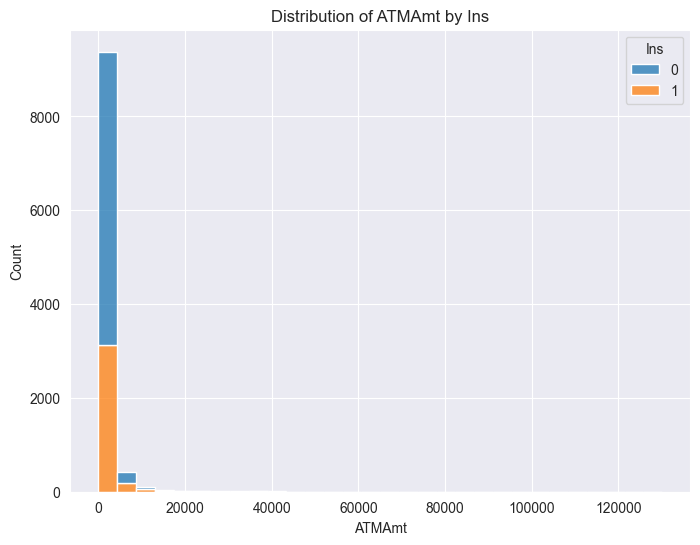

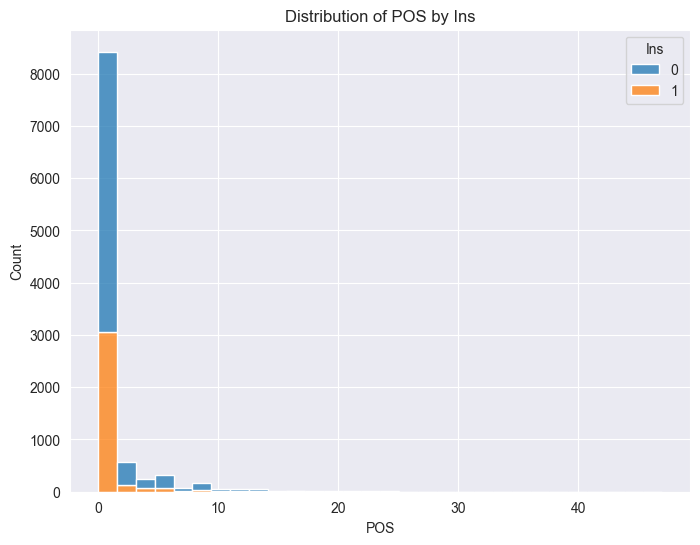

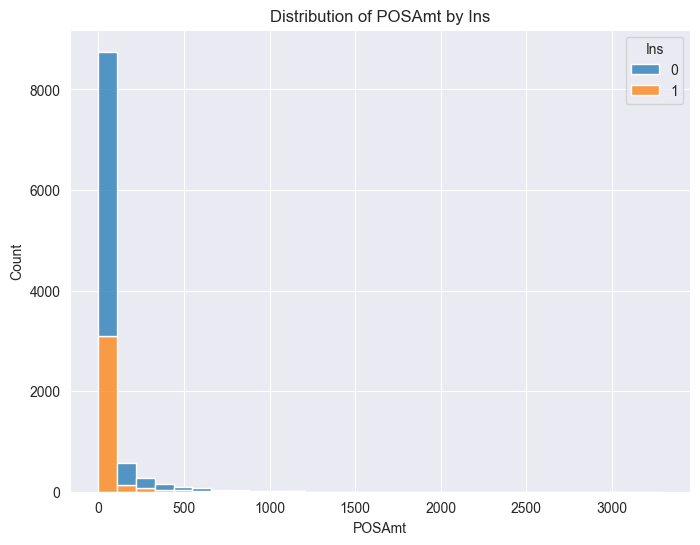

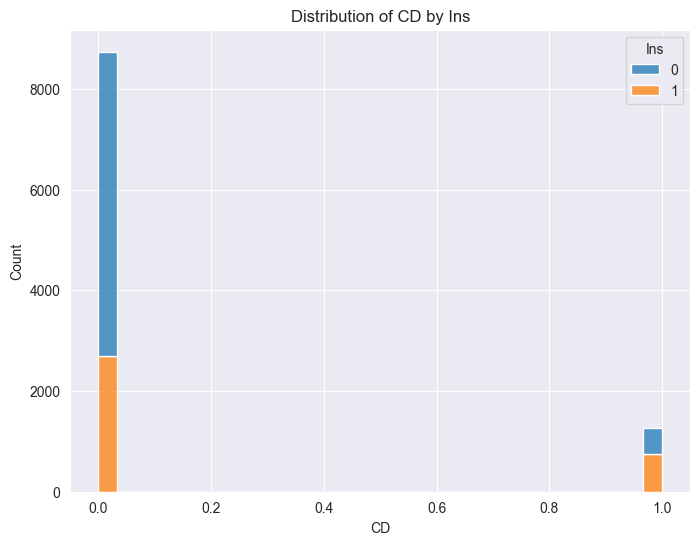

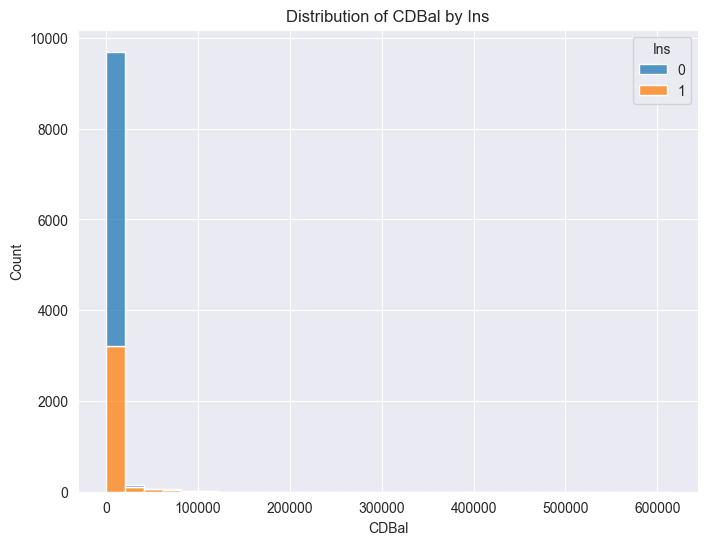

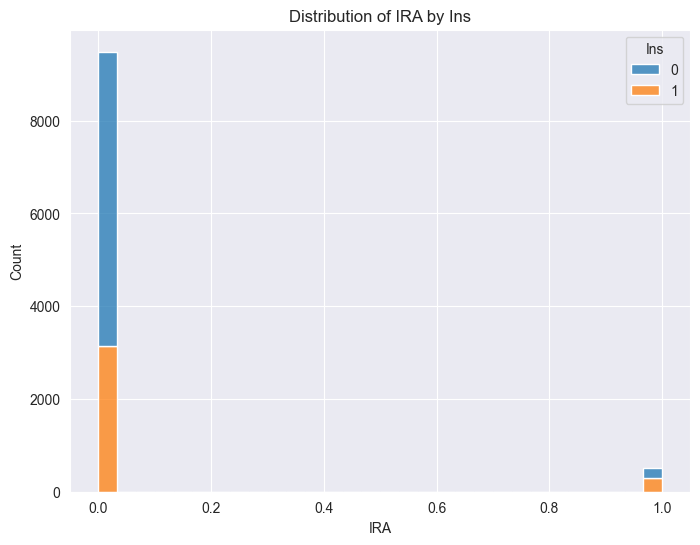

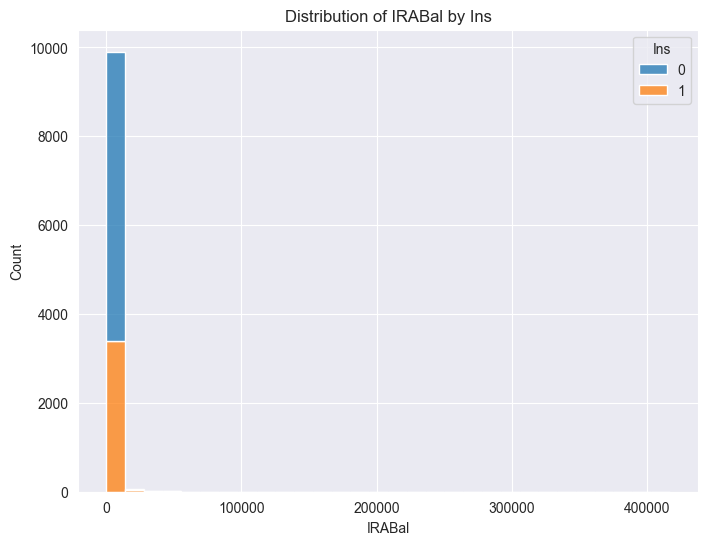

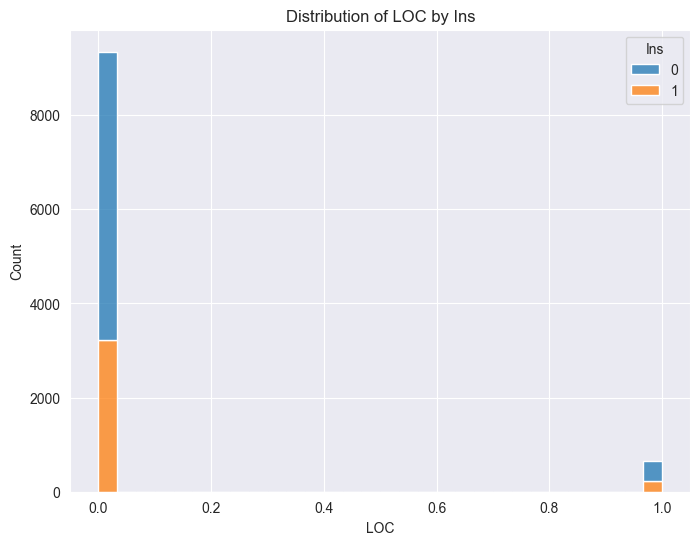

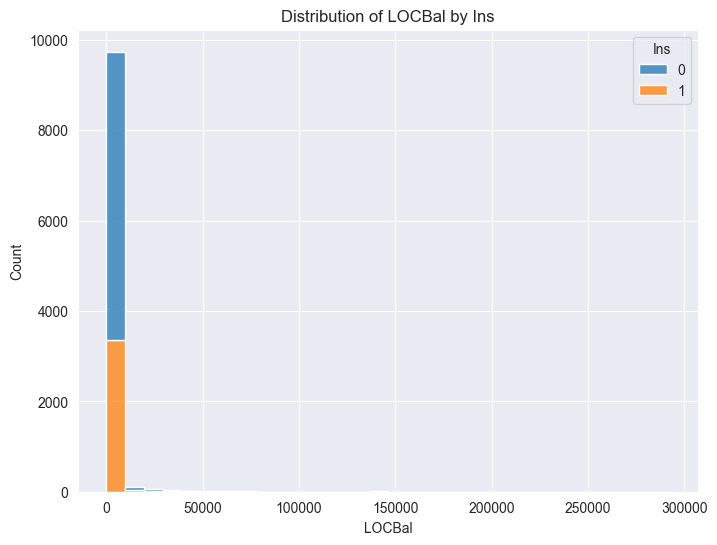

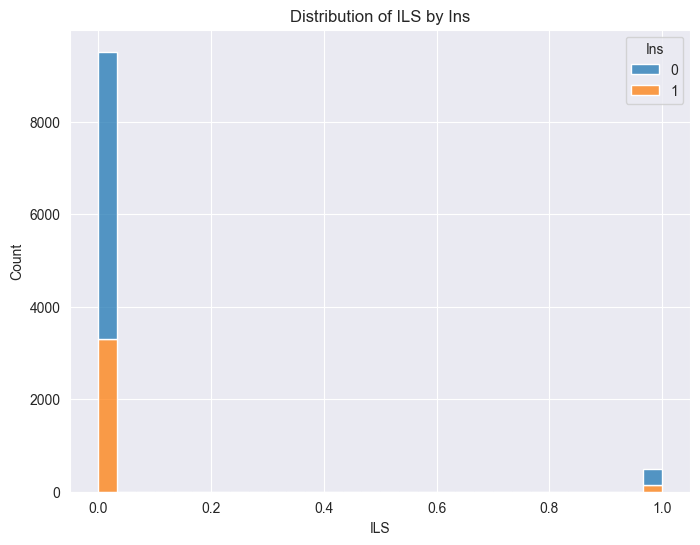

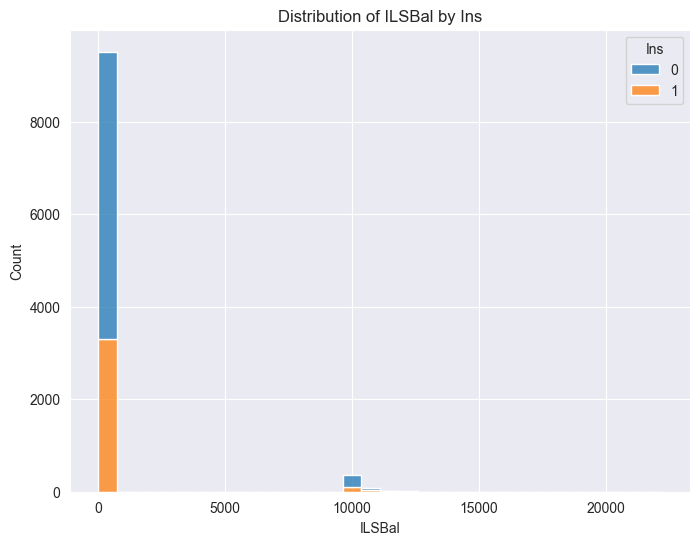

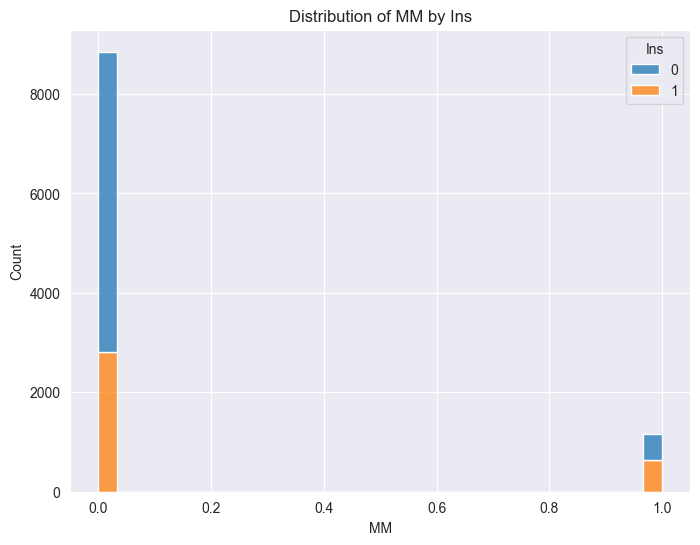

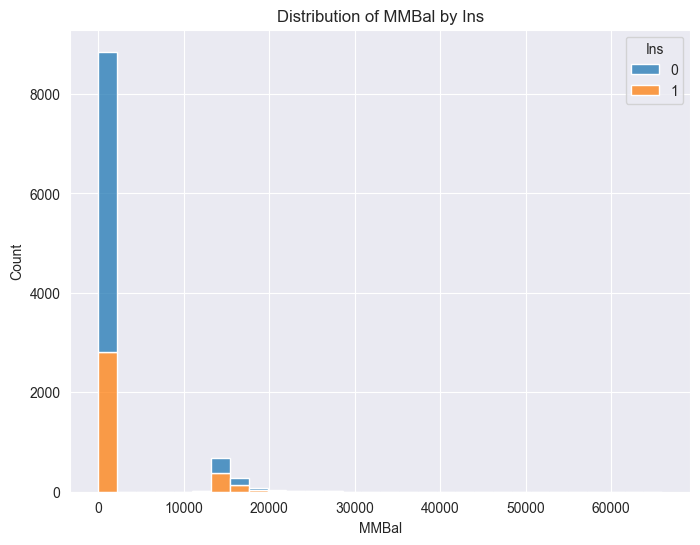

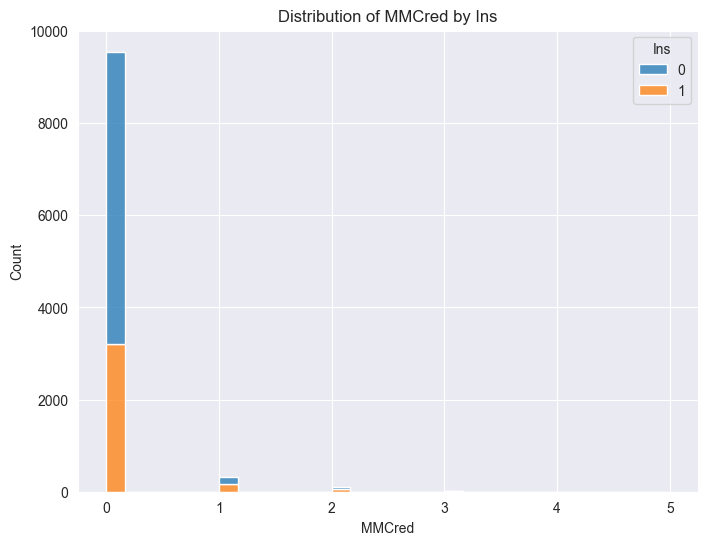

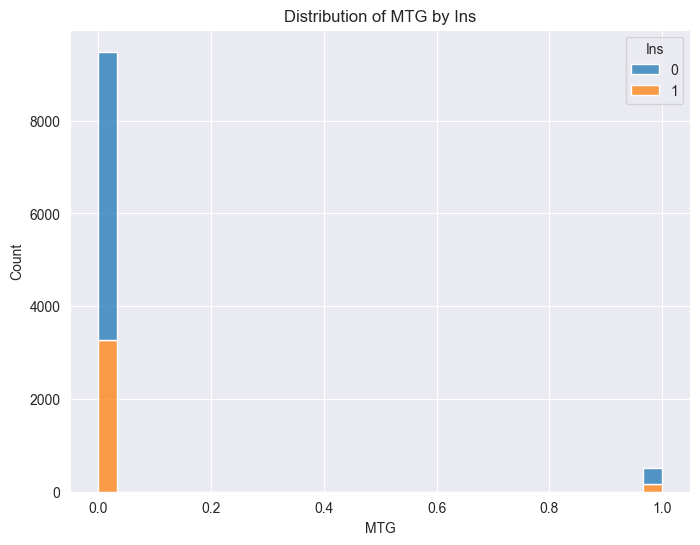

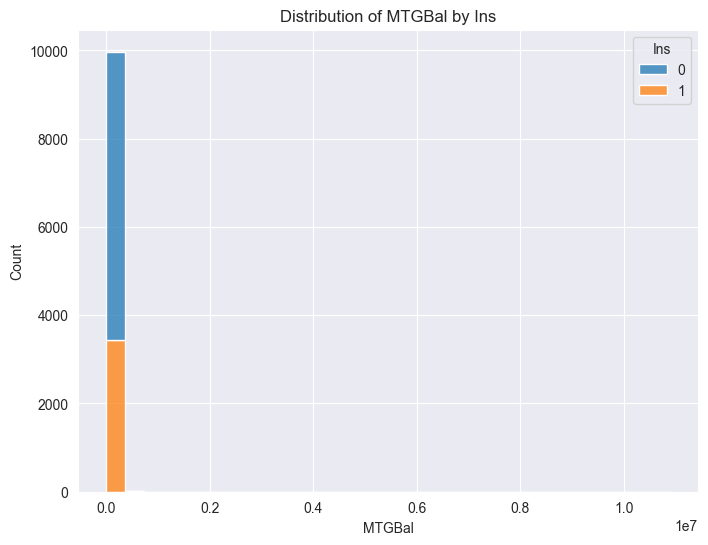

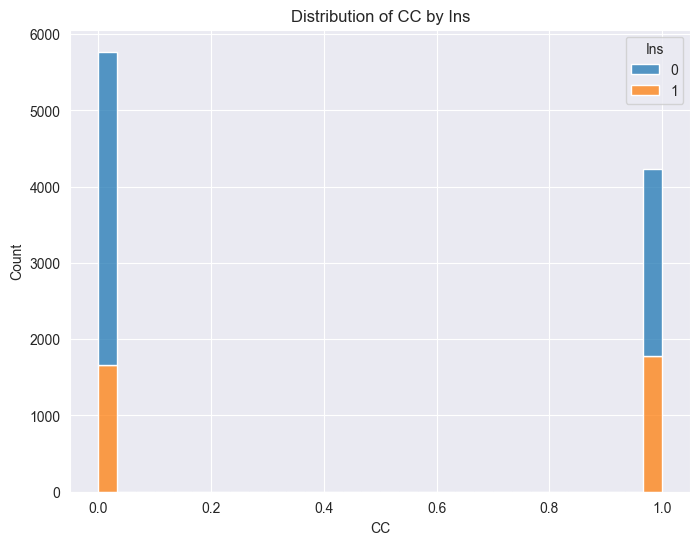

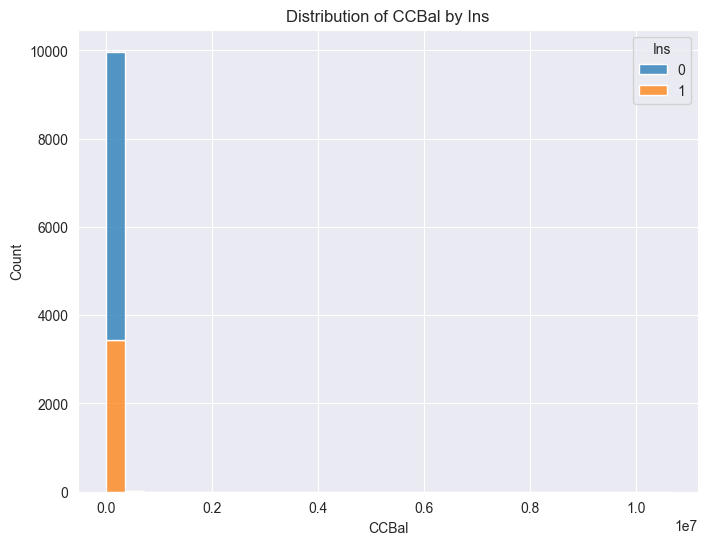

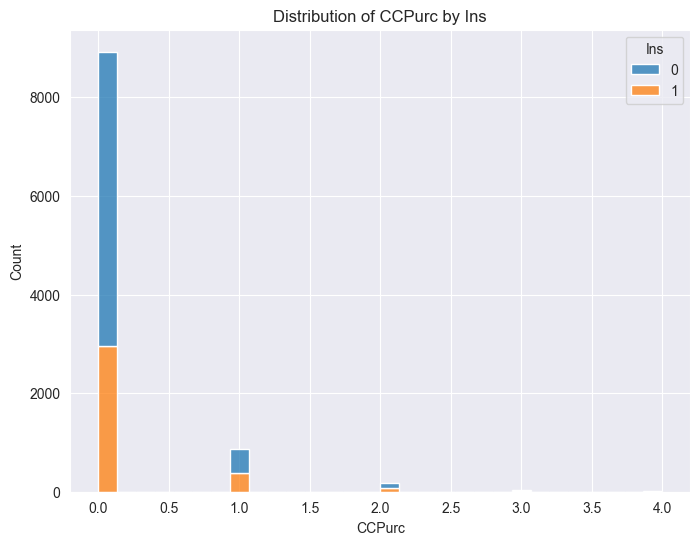

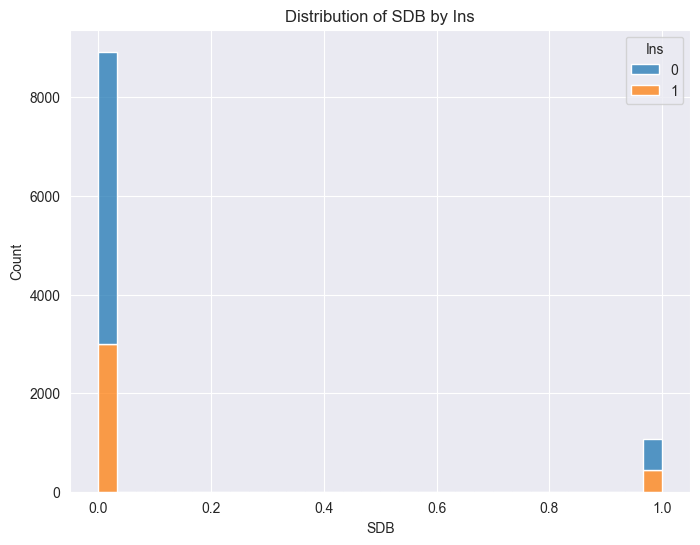

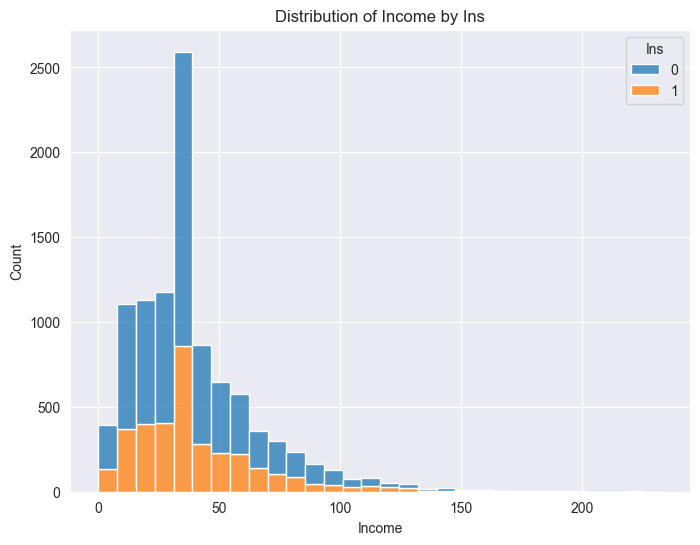

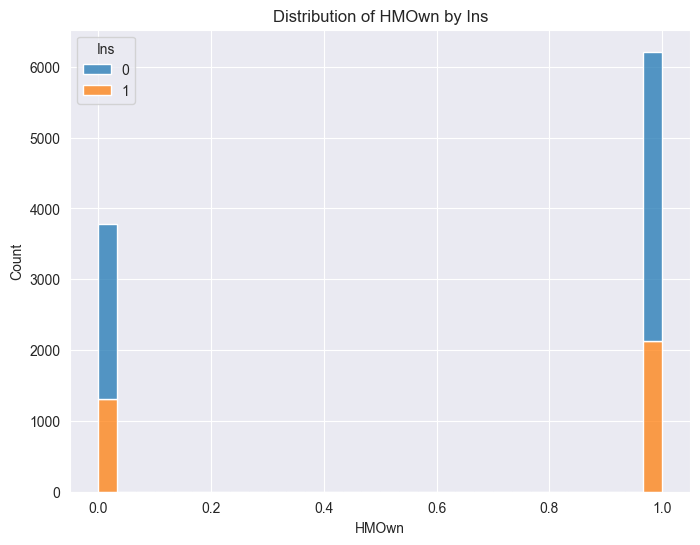

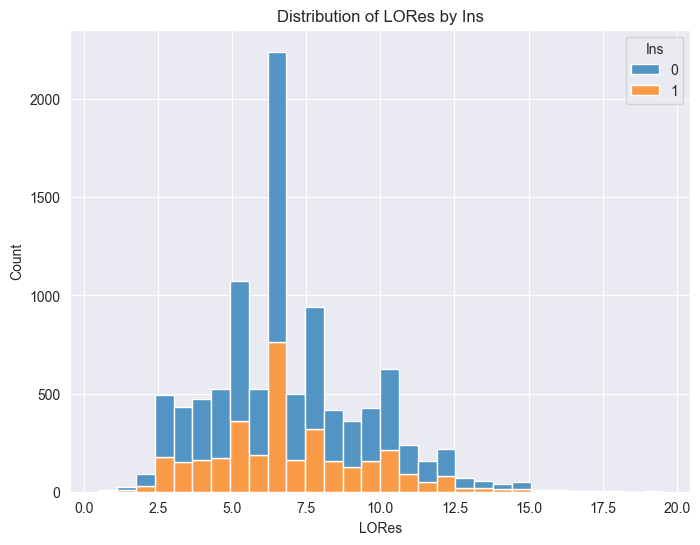

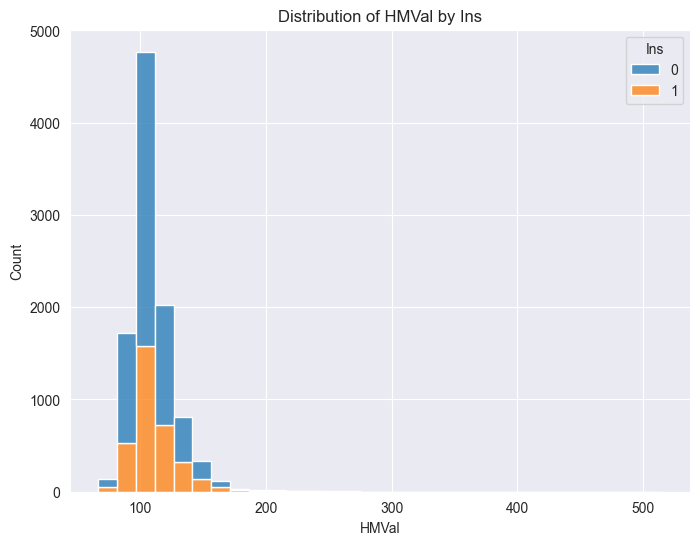

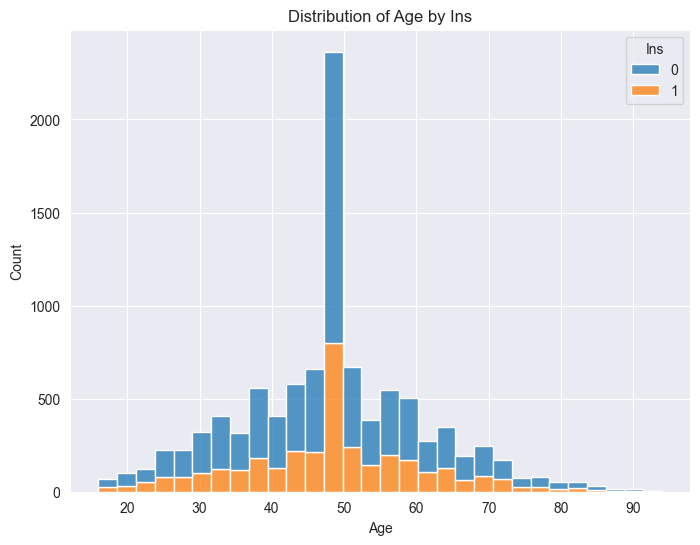

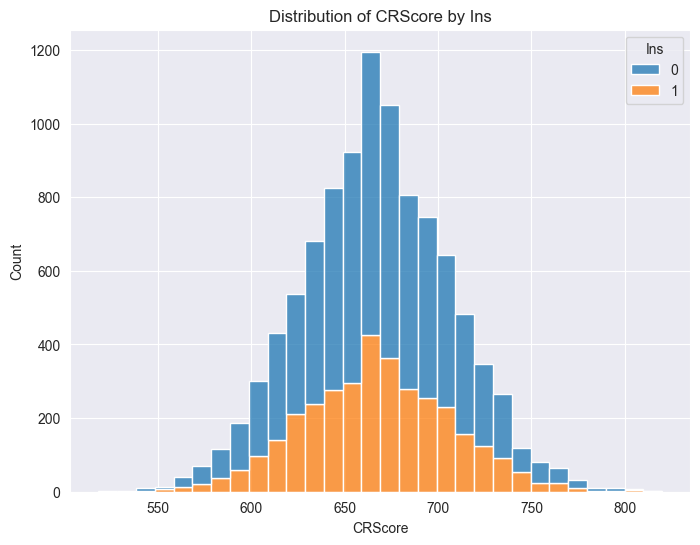

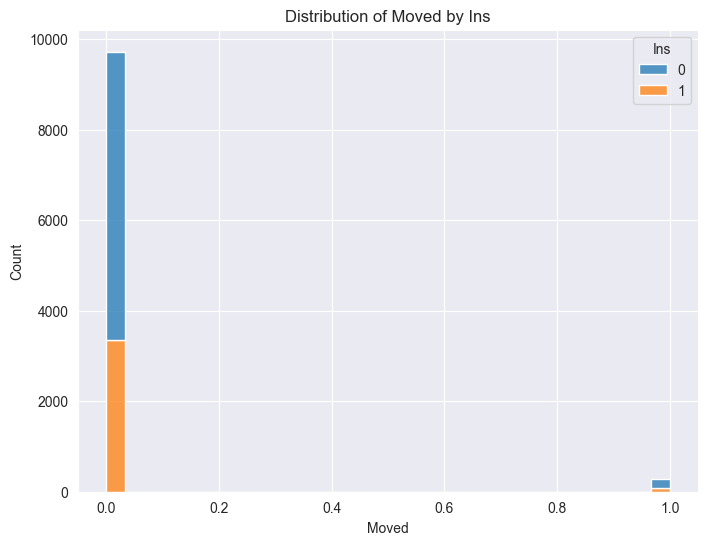

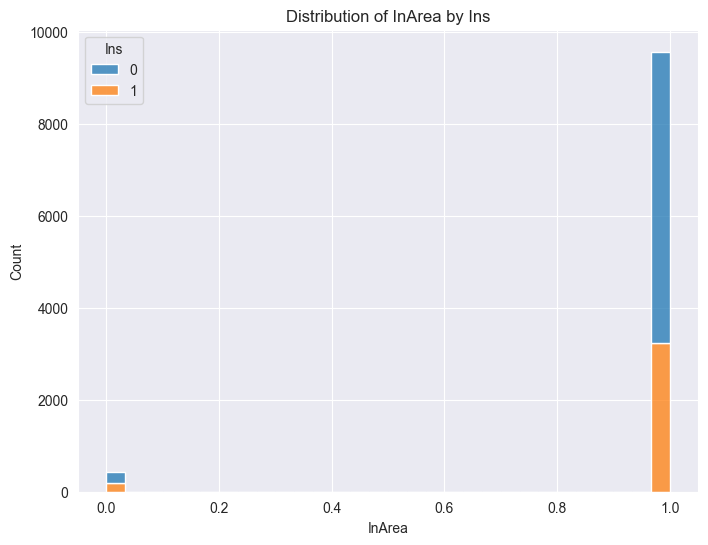

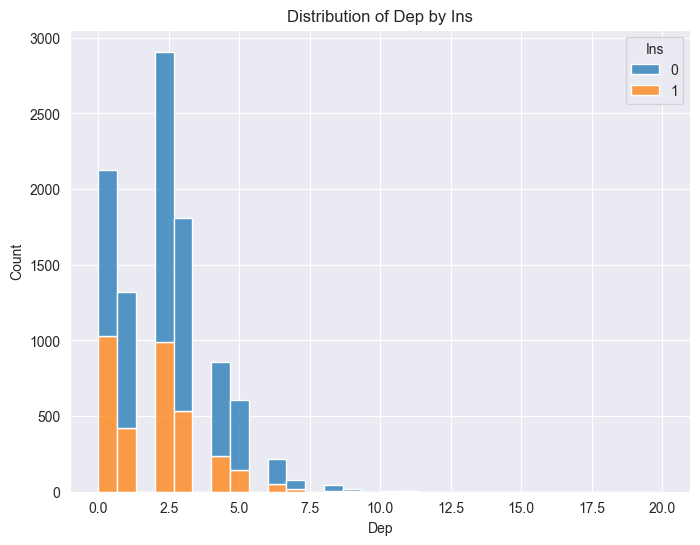

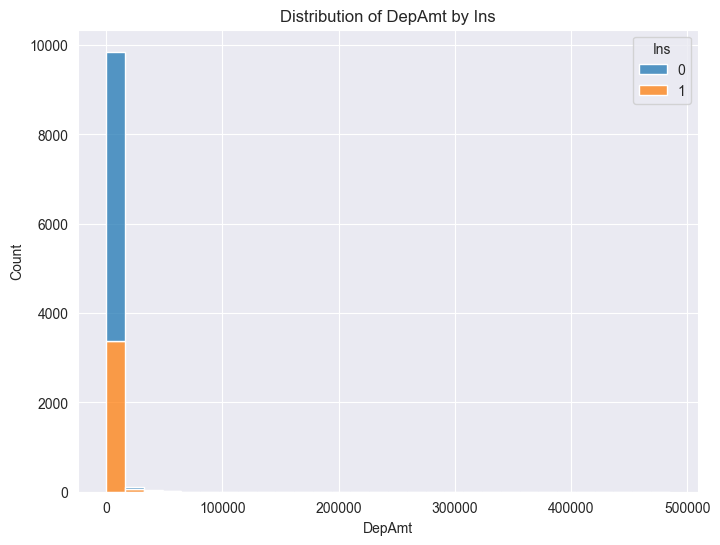

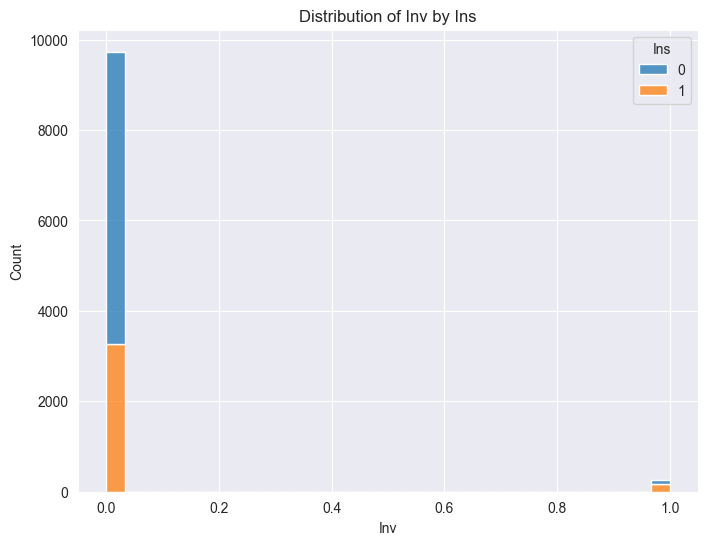

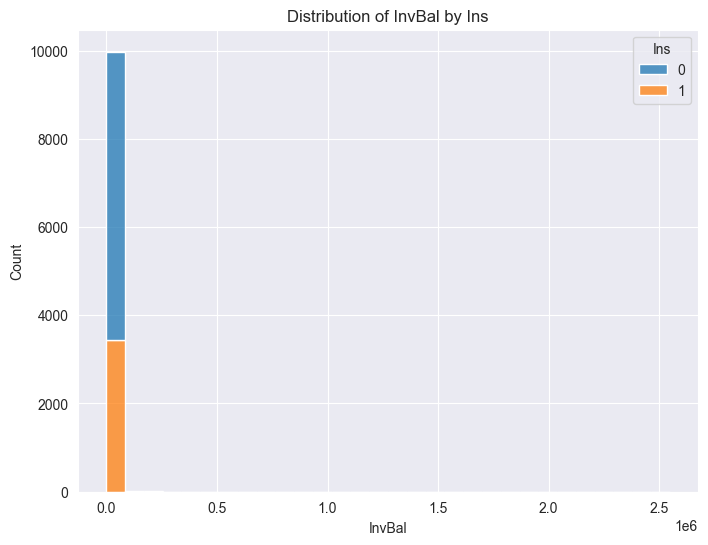

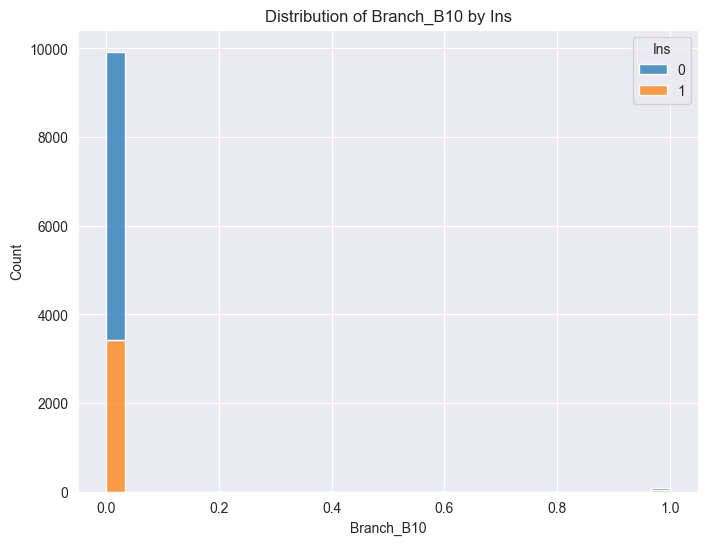

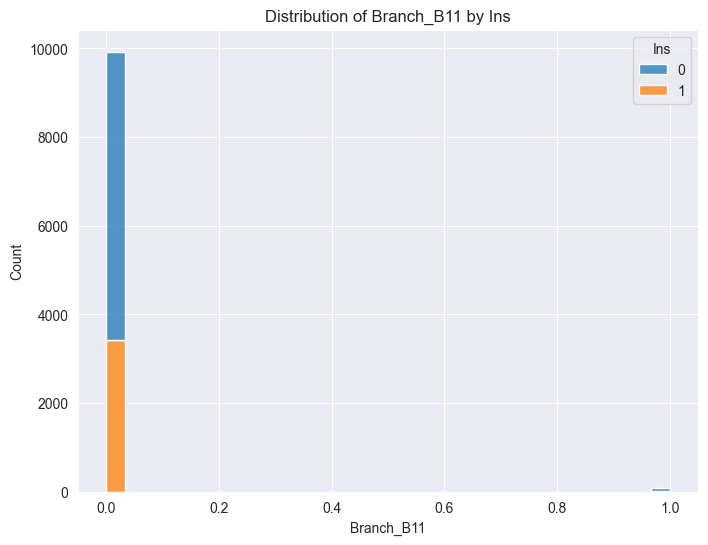

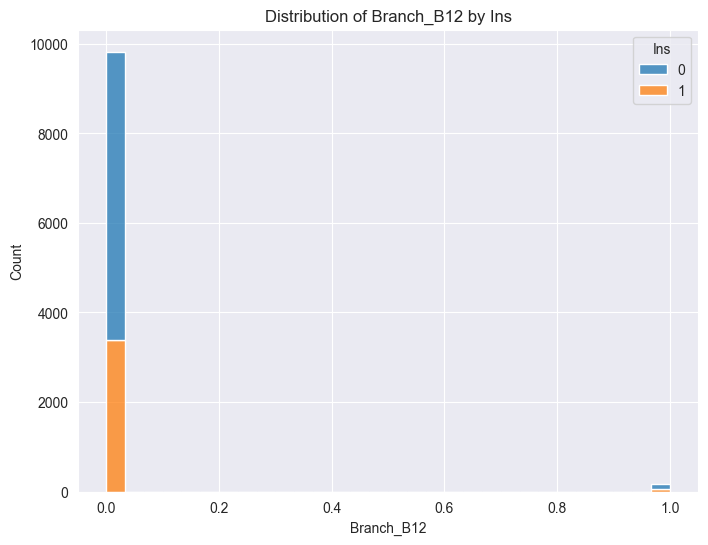

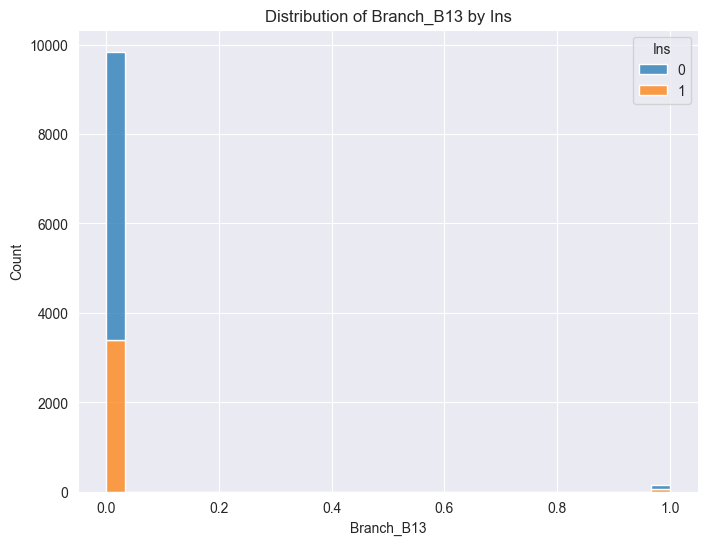

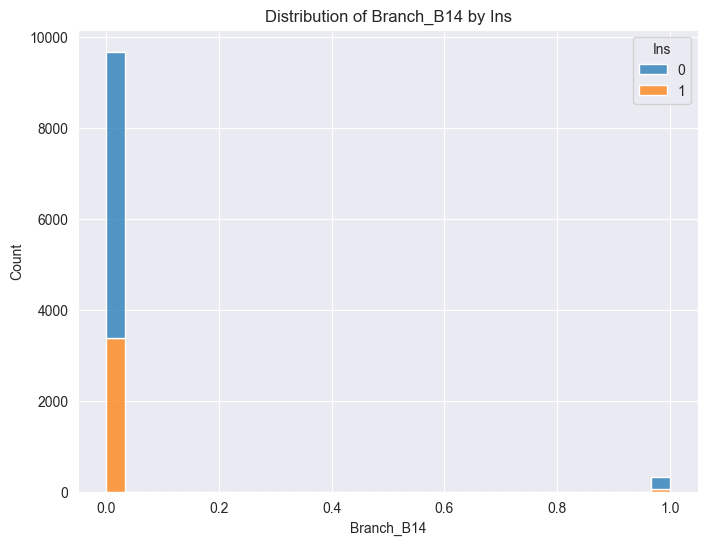

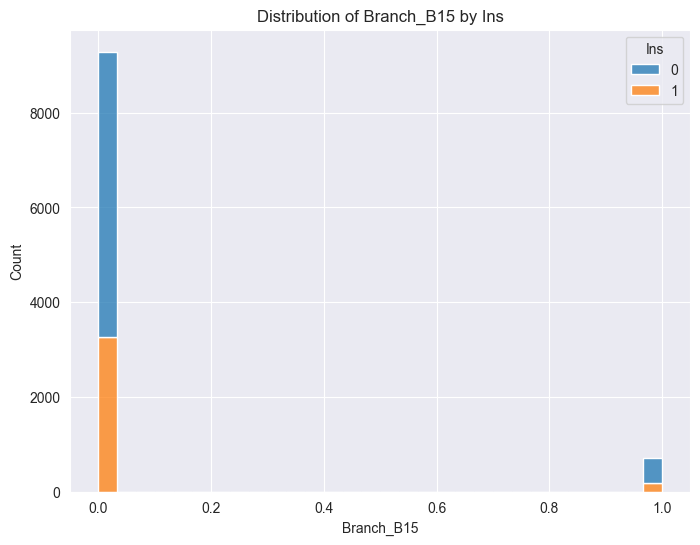

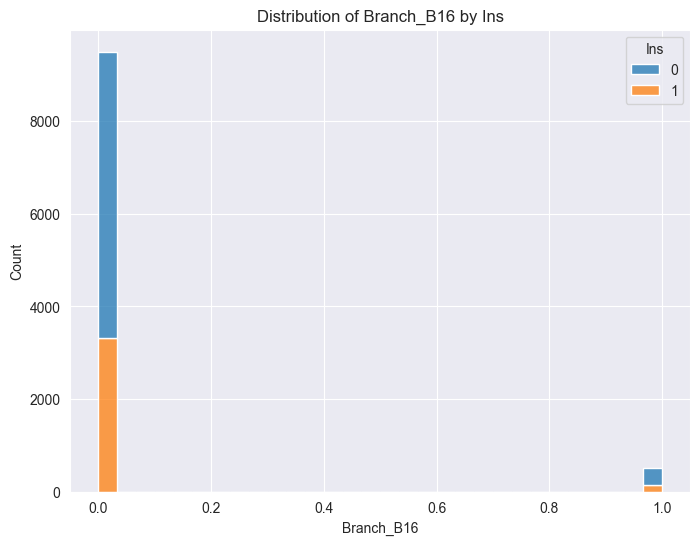

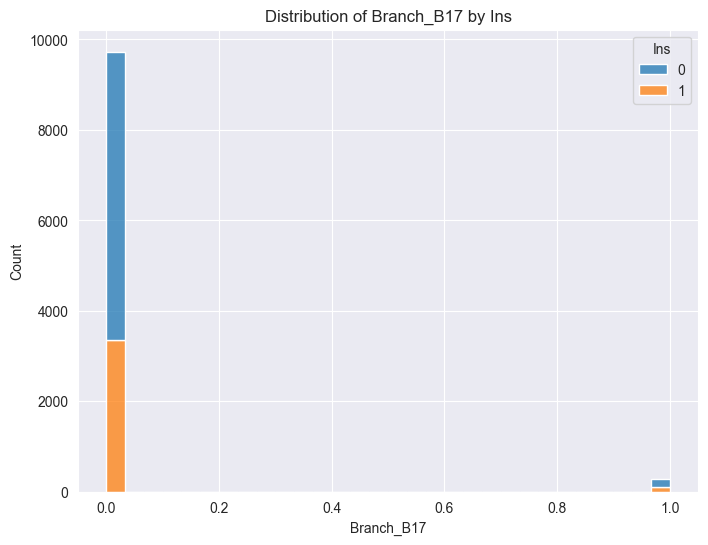

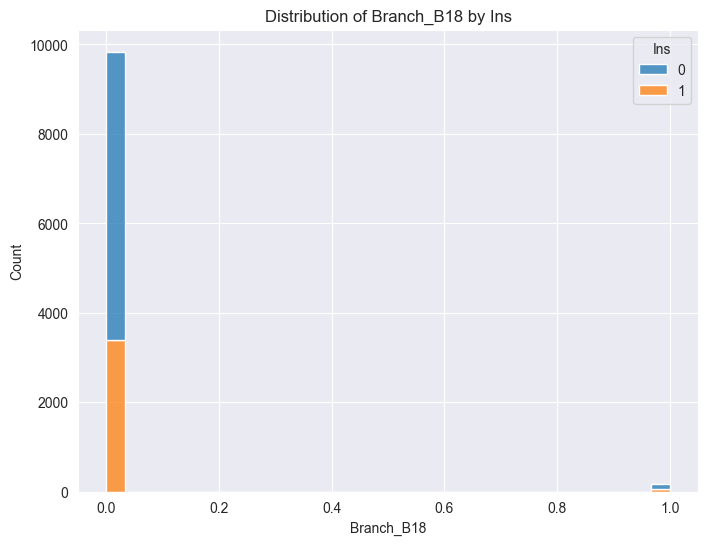

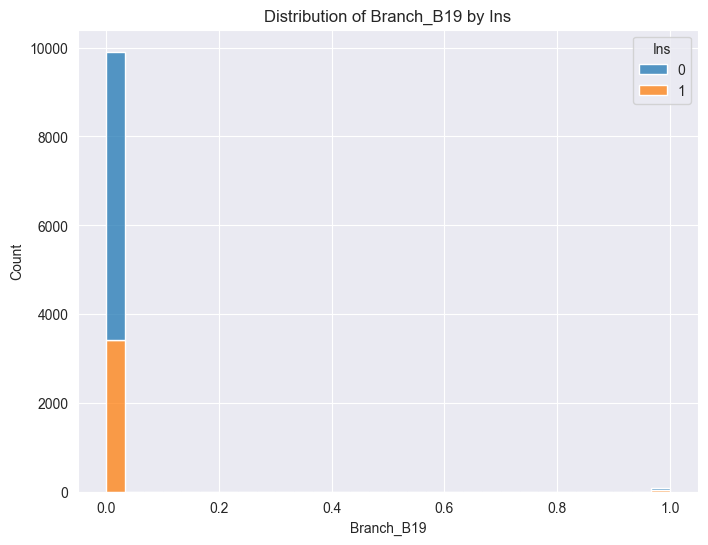

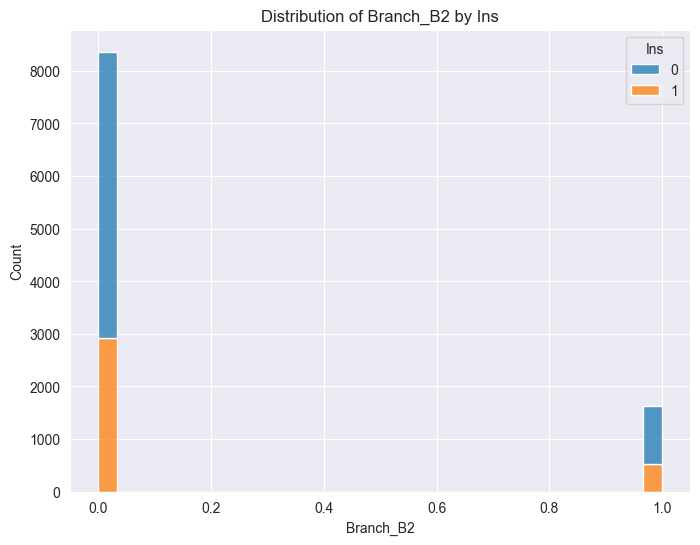

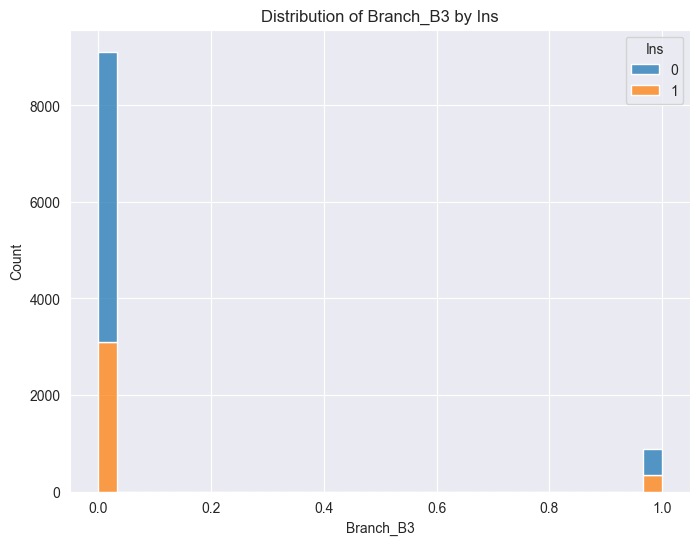

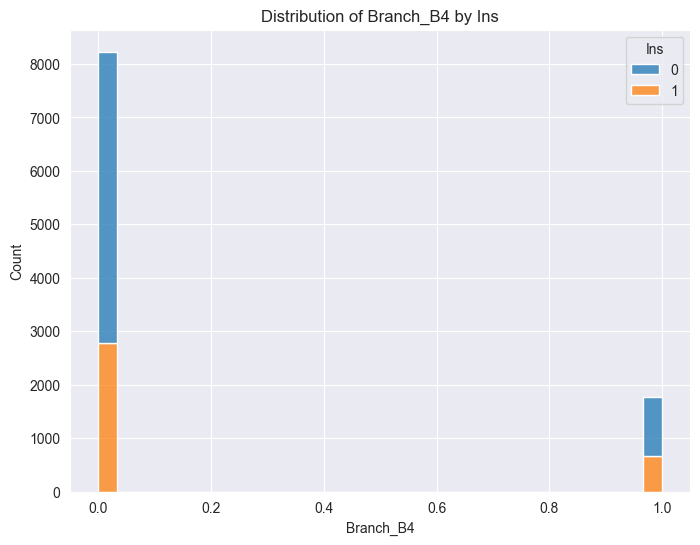

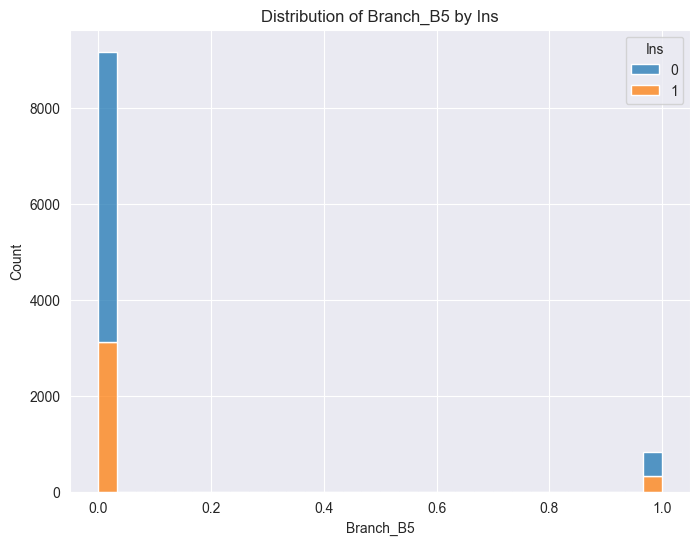

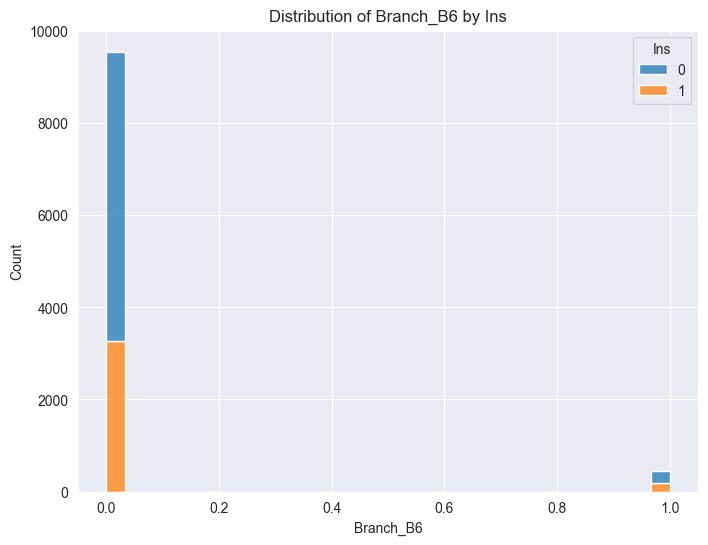

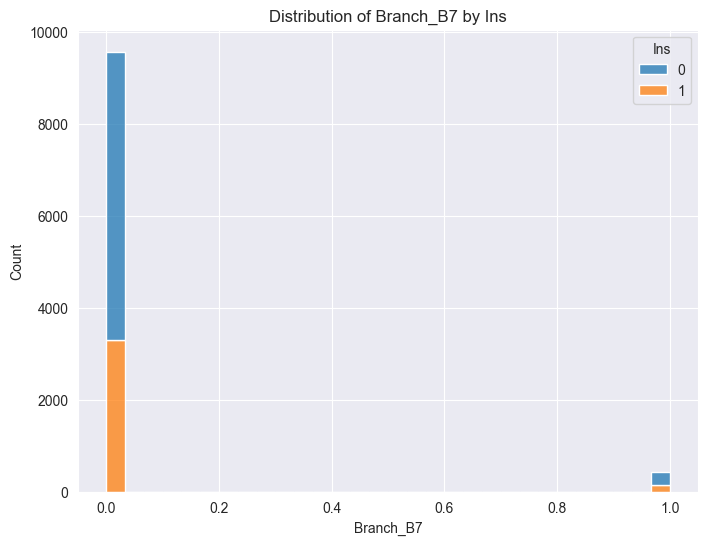

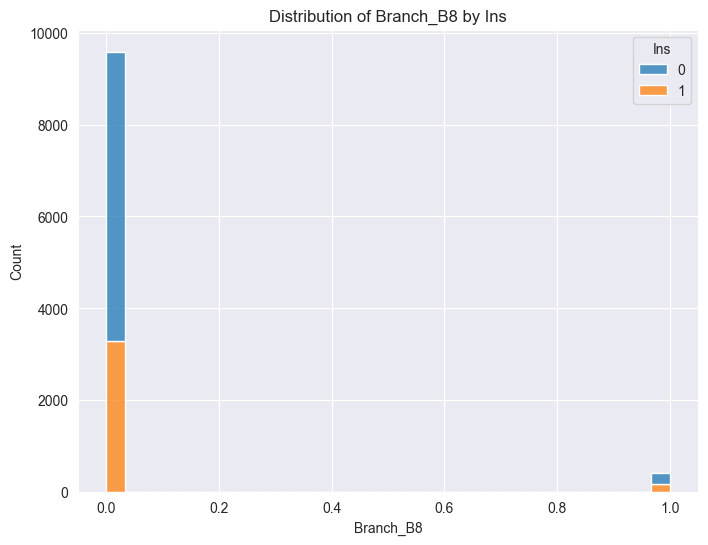

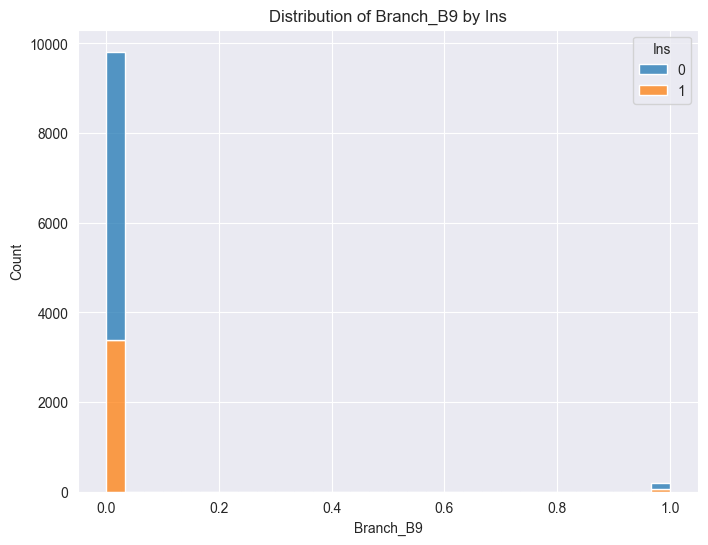

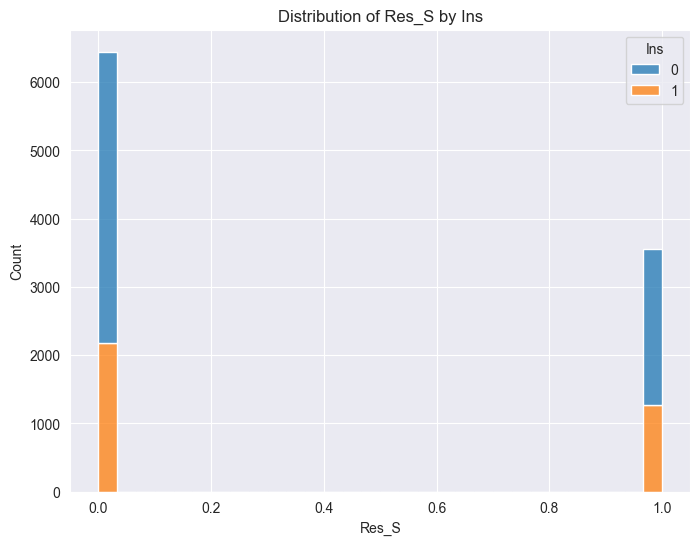

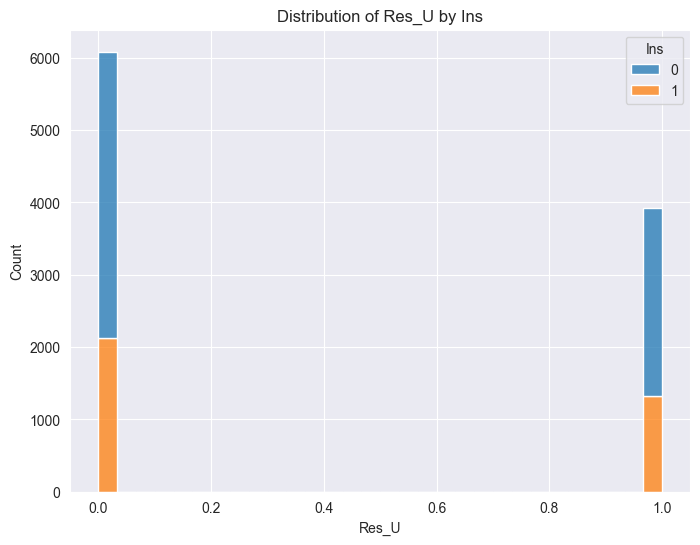

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `data` is a predefined DataFrame
target = 'Ins'  # Replace with the actual target variable name

# Check for class imbalance in the target variable
class_distribution = data[target].value_counts()
print(f"\nClass Distribution:\n{class_distribution}")

# If class imbalance is detected (less than 15% for any class), consider rebalancing
if (class_distribution.min() / class_distribution.sum()) < 0.15:
    print("Class imbalance detected, consider rebalancing techniques.")

# Convert categorical variables to dummy variables
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=data)
plt.title('Ins-Target Distribution')
plt.show()

# Optional: Sample the data for faster plotting (useful for large datasets)
sample_data = data.sample(n=10000) if len(data) > 10000 else data

# Plot histograms of features grouped by target
for column in sample_data.columns:
    if column != target:
        plt.figure(figsize=(8, 6))
        sns.histplot(sample_data, x=column, hue=target, multiple="stack", kde=False, bins=30)
        plt.title(f'Distribution of {column} by {target}')
        plt.show()
        plt.close()  # Close each plot to avoid memory issues

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Separate features and target
X = data.drop(target, axis=1)
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.columns)
# Check the size and class distribution before SMOTE
print("Original training data shape:", X_train.shape)
print("Original class distribution in training data:", Counter(y_train))

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the size and class distribution after SMOTE
print("Training data shape after SMOTE:", X_train_resampled.shape)
print("Class distribution in training data after SMOTE:", Counter(y_train_resampled))

# Standardize the data after SMote
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

print("Training data shape after standardization:", X_train_resampled.shape)
print("Test data shape:", X_test.shape)

Index(['AcctAge', 'DDA', 'DDABal', 'CashBk', 'Checks', 'DirDep', 'NSF',
       'NSFAmt', 'Phone', 'Teller', 'Sav', 'SavBal', 'ATM', 'ATMAmt', 'POS',
       'POSAmt', 'CD', 'CDBal', 'IRA', 'IRABal', 'LOC', 'LOCBal', 'ILS',
       'ILSBal', 'MM', 'MMBal', 'MMCred', 'MTG', 'MTGBal', 'CC', 'CCBal',
       'CCPurc', 'SDB', 'Income', 'HMOwn', 'LORes', 'HMVal', 'Age', 'CRScore',
       'Moved', 'InArea', 'Dep', 'DepAmt', 'Inv', 'InvBal', 'Branch_B10',
       'Branch_B11', 'Branch_B12', 'Branch_B13', 'Branch_B14', 'Branch_B15',
       'Branch_B16', 'Branch_B17', 'Branch_B18', 'Branch_B19', 'Branch_B2',
       'Branch_B3', 'Branch_B4', 'Branch_B5', 'Branch_B6', 'Branch_B7',
       'Branch_B8', 'Branch_B9', 'Res_S', 'Res_U'],
      dtype='object')
Original training data shape: (25811, 65)
Original class distribution in training data: Counter({0: 16871, 1: 8940})
Training data shape after SMOTE: (33742, 65)
Class distribution in training data after SMOTE: Counter({0: 16871, 1: 16871})
Training da

## Part 4: Model Training and Evaluation

## Part 3: Train-Test Split and SMOTE Application



Logistic Regression AUC: 0.741
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4218
           1       0.62      0.52      0.57      2235

    accuracy                           0.72      6453
   macro avg       0.69      0.68      0.68      6453
weighted avg       0.71      0.72      0.72      6453



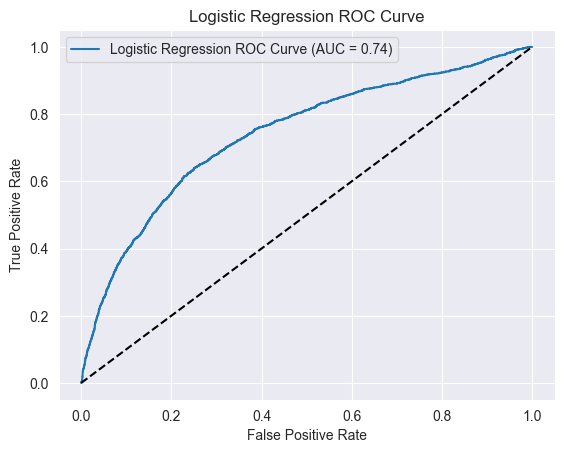

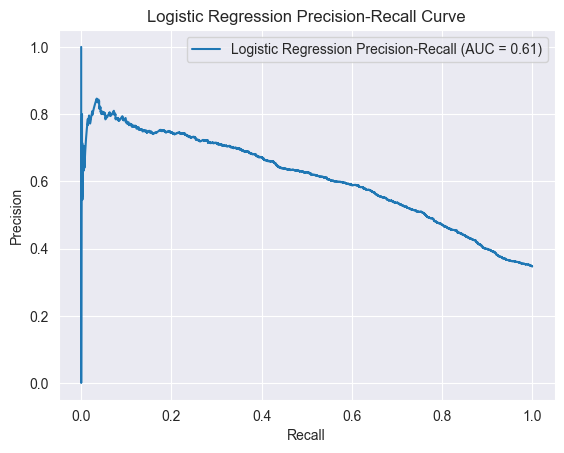


Random Forest AUC: 0.800
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4218
           1       0.63      0.64      0.64      2235

    accuracy                           0.75      6453
   macro avg       0.72      0.72      0.72      6453
weighted avg       0.75      0.75      0.75      6453



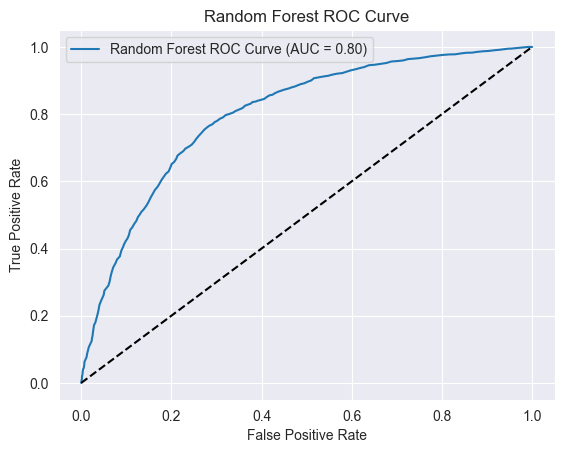

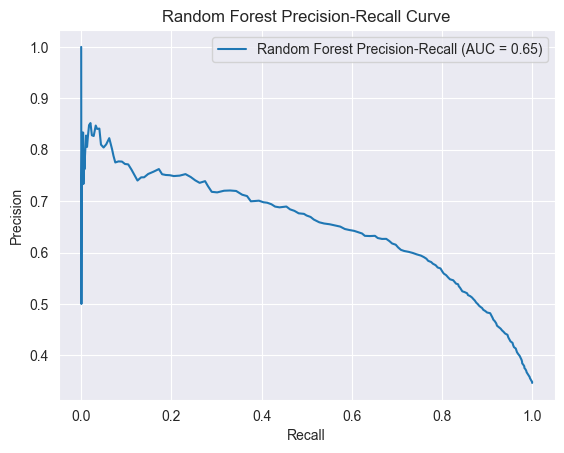


Support Vector Classifier AUC: 0.773
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      4218
           1       0.65      0.54      0.59      2235

    accuracy                           0.74      6453
   macro avg       0.71      0.69      0.70      6453
weighted avg       0.73      0.74      0.73      6453



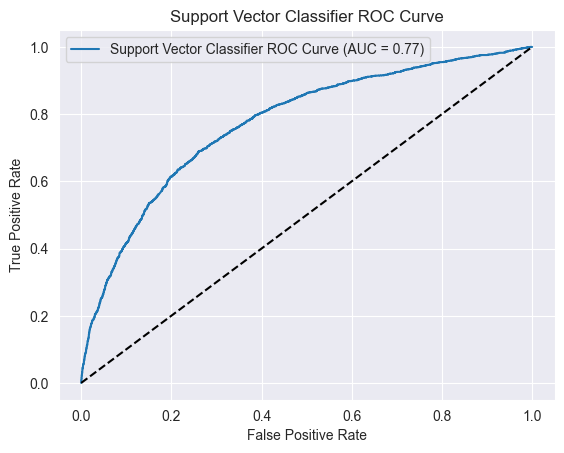

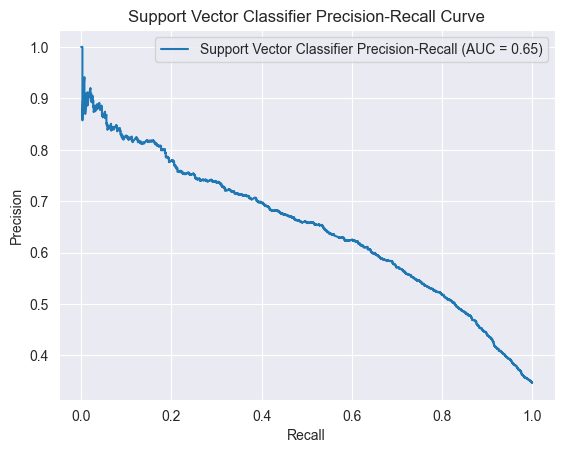


Gradient Boosting AUC: 0.796
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4218
           1       0.64      0.62      0.63      2235

    accuracy                           0.75      6453
   macro avg       0.72      0.72      0.72      6453
weighted avg       0.75      0.75      0.75      6453



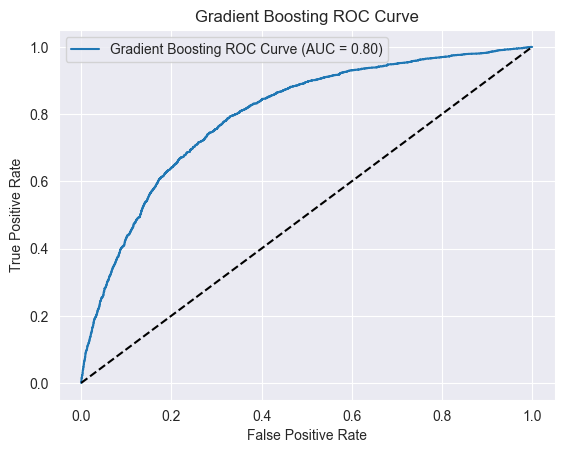

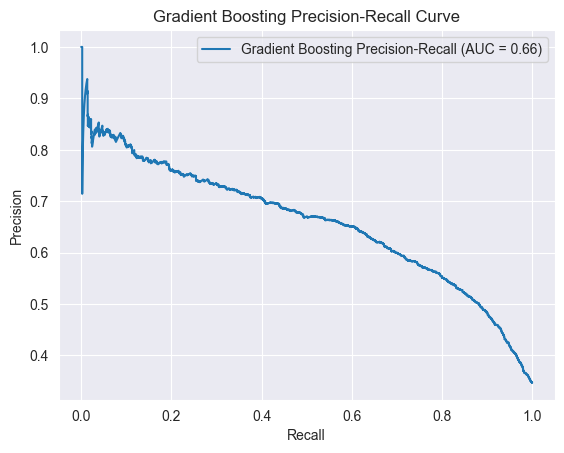


K-Nearest Neighbors AUC: 0.663
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4218
           1       0.52      0.44      0.48      2235

    accuracy                           0.67      6453
   macro avg       0.63      0.62      0.62      6453
weighted avg       0.66      0.67      0.66      6453



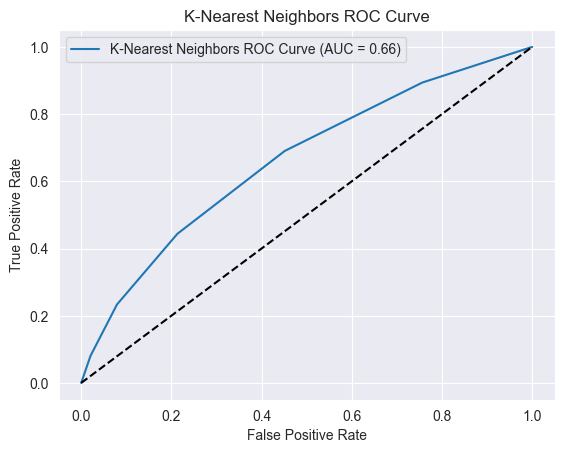

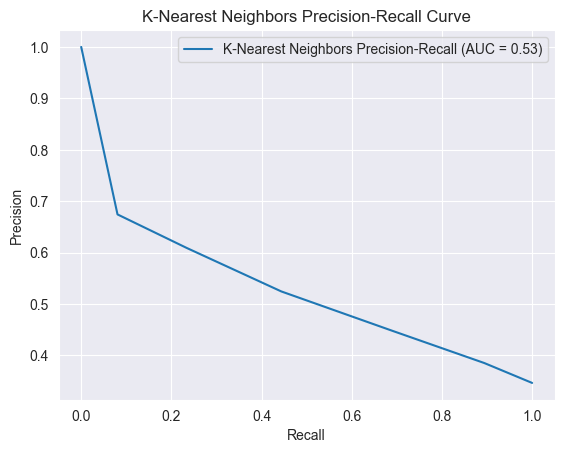


Neural Network AUC: 0.721
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4218
           1       0.56      0.54      0.55      2235

    accuracy                           0.70      6453
   macro avg       0.66      0.66      0.66      6453
weighted avg       0.69      0.70      0.69      6453



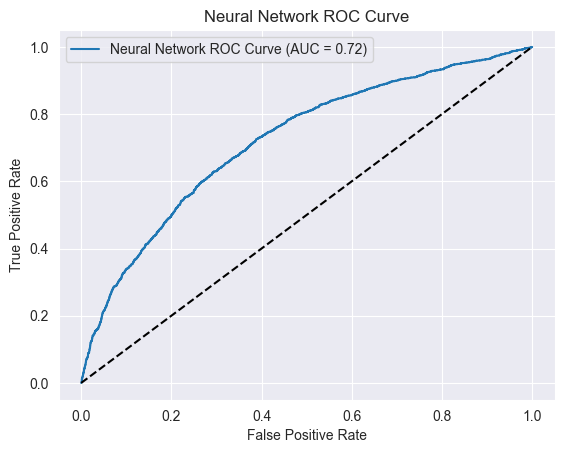

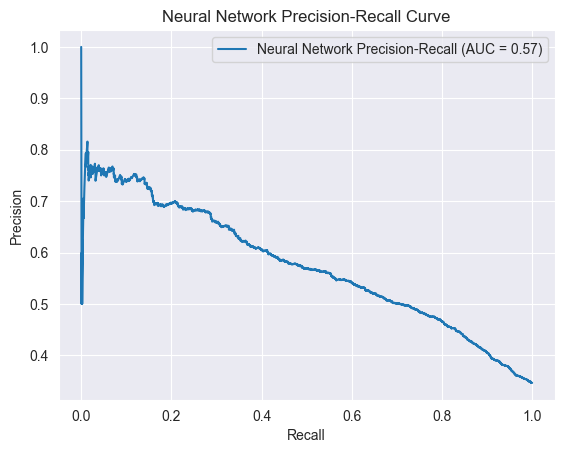

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier  # Import for neural network
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Define models to evaluate, including a neural network (MLPClassifier)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"\n{name} AUC: {auc_score:.3f}")
    print(classification_report(y_test, y_pred))
    
    results[name] = {
        'model': model,
        'auc': auc_score,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)  # Calculate the AUC for the precision-recall curve
    plt.plot(recall, precision, label=f'{name} Precision-Recall (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

## Part 5: Hyperparameter tuning (GRID)

Optimizing hyperparameters for Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC for Random Forest: 0.891
Optimizing hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best AUC for Gradient Boosting: 0.875

Random Forest (Optimized) AUC: 0.801
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4218
           1       0.63      0.65      0.64      2235

    accuracy                           0.75      6453
   macro avg       0.72      0.72      0.72      6453
weighted avg       0.75      0.75      0.75      6453



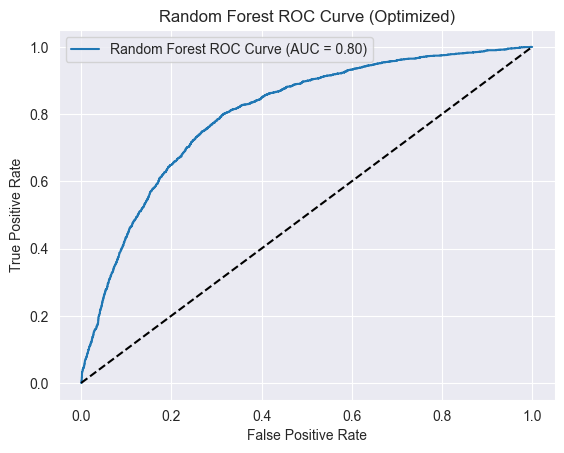

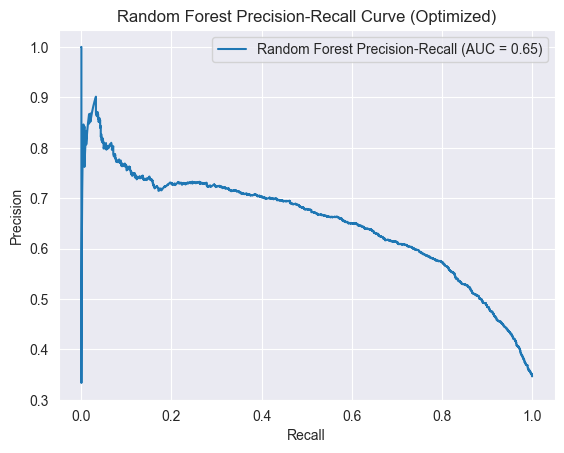


Gradient Boosting (Optimized) AUC: 0.803
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4218
           1       0.63      0.66      0.65      2235

    accuracy                           0.75      6453
   macro avg       0.72      0.73      0.73      6453
weighted avg       0.75      0.75      0.75      6453



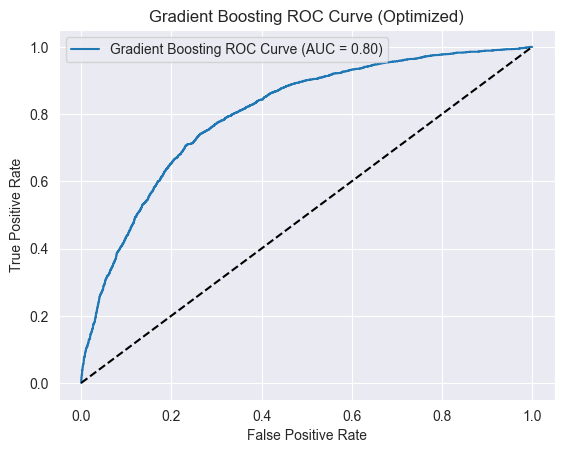

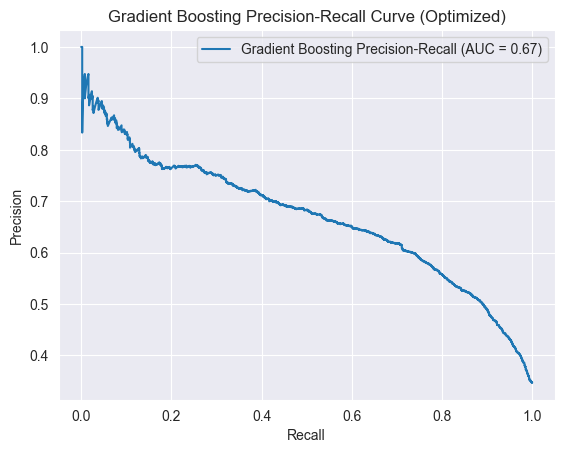

In [9]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define a stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for Random Forest
"""rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}"""

# Hyperparameter grid for Gradient Boosting
"""gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}"""

# Hyperparameter grid for Neural Network (MLPClassifier)
"""mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}"""

# Hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [300],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

gb_params = {
    'n_estimators': [300],
    'learning_rate': [0.01],
    'max_depth': [7],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}



# Define models with their corresponding parameter grids
models_params = {
    'Random Forest': (RandomForestClassifier(random_state=42), rf_params),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), gb_params)
 #   'Neural Network': (MLPClassifier(max_iter=500, random_state=42), mlp_params)
}

# Iterate through each model and perform GridSearchCV
best_estimators = {}
for name, (model, params) in models_params.items():
    print(f"Optimizing hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Best AUC for {name}: {grid_search.best_score_:.3f}")

# Evaluate the best models on the test set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"\n{name} (Optimized) AUC: {auc_score:.3f}")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve (Optimized)')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} Precision-Recall (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve (Optimized)')
    plt.legend(loc='best')
    plt.show()

## AUTO ML(TPOT) & AUTO-sklearn


In [17]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data.drop(columns=[target])  # Define X without target
y = data[target]  # Define target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TPOT AutoML
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

                                                                             
Generation 1 - Current best internal CV score: 0.7480531271033131
                                                                             
Generation 2 - Current best internal CV score: 0.7480531271033131
                                                                             
Generation 3 - Current best internal CV score: 0.7492153697257098
                                                                              
Generation 4 - Current best internal CV score: 0.7492153697257098
                                                                              
Generation 5 - Current best internal CV score: 0.7492153697257098
                                                                              
Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=5, min_samples_split=4, n_estimators=100)
TPOT Test Accuracy: 0.75

TPOT Test Accuracy: 0.7528
TPOT Test AUC: 0.8090

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      4218
           1       0.67      0.57      0.61      2235

    accuracy                           0.75      6453
   macro avg       0.73      0.71      0.72      6453
weighted avg       0.75      0.75      0.75      6453



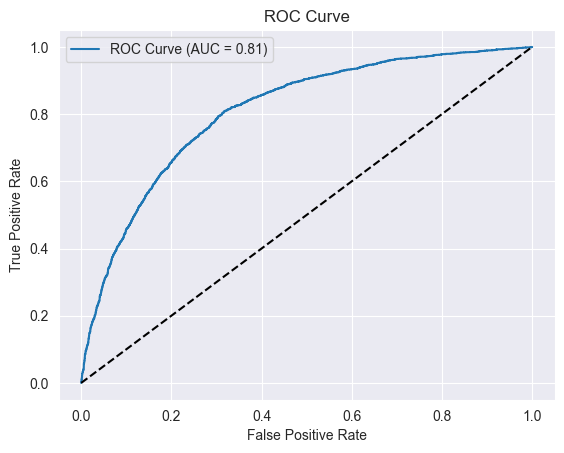

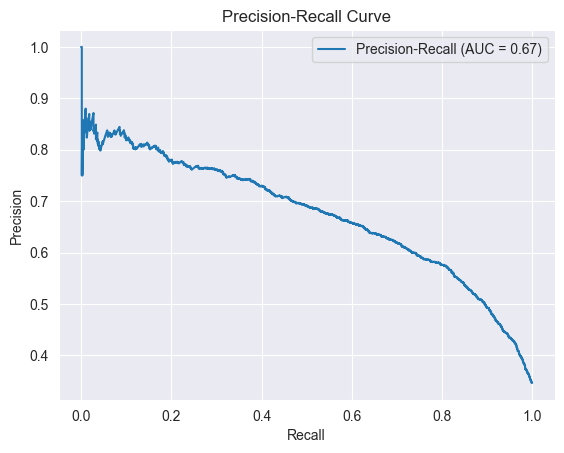

In [19]:

accuracy = tpot.score(X_test, y_test)
y_pred = tpot.predict(X_test)
y_prob = tpot.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"TPOT Test Accuracy: {accuracy:.4f}")
print(f"TPOT Test AUC: {auc_score:.4f}")

# Print the classification report
print(f"\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

#### Using XGBoost

XGBoost AUC: 0.801

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      4218
           1       0.57      0.79      0.66      2235

    accuracy                           0.72      6453
   macro avg       0.71      0.73      0.71      6453
weighted avg       0.76      0.72      0.73      6453



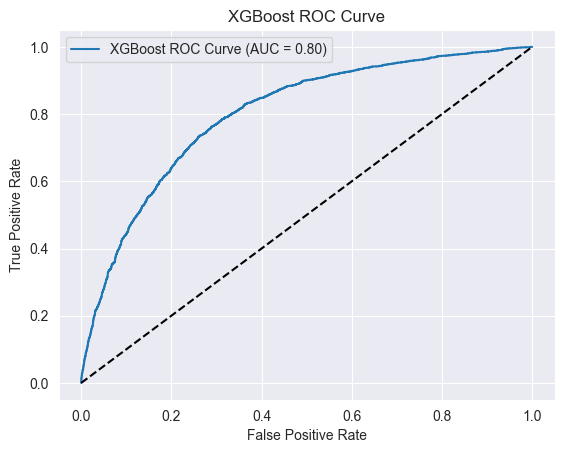

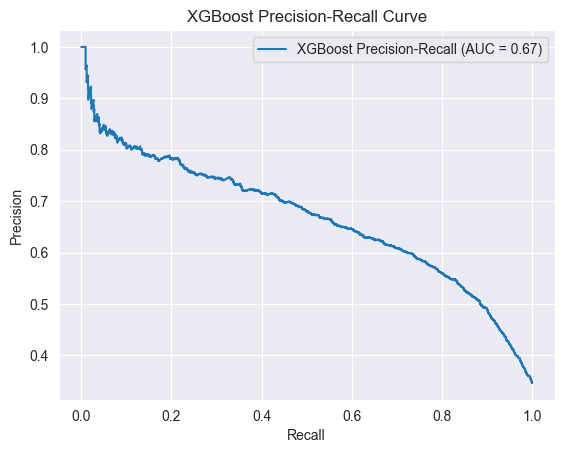

<Figure size 1000x800 with 0 Axes>

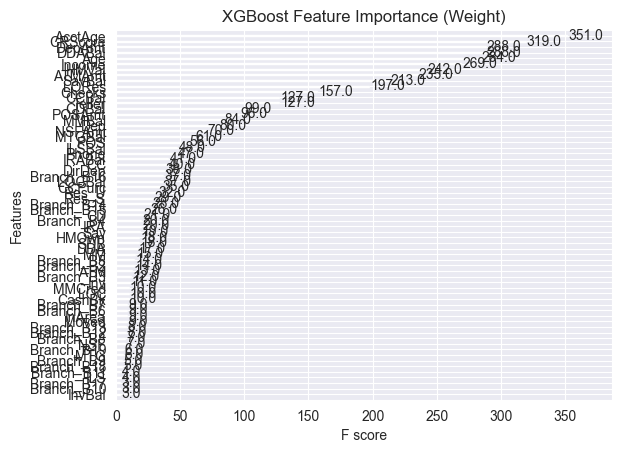

In [23]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Define and fit the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train) / y_train.value_counts()[1])  # Adjust scale_pos_weight for imbalance
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"XGBoost AUC: {auc_score:.3f}")
print(f"\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC and Precision-Recall curves
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='best')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'XGBoost Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plotting feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight')
plt.title('XGBoost Feature Importance (Weight)')
plt.show()

## Feature Engineering Variations

#### Scaling and Transformation

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PolynomialFeatures

# Step 1: Feature Creation
# Creating meaningful new features based on the existing variables
X = data.drop(columns=[target])  # Define X without the target variable
y = data[target]  # Define the target variable

# Creating new ratio features
# Using a small constant (1e-5) to avoid division by zero errors.
X['ATM Withdrawal Ratio'] = X['ATMAmt'] / (X['DDABal'] + 1e-5)  # Ratio of ATM withdrawal amount to checking balance
X['Credit Card Usage Ratio'] = X['CCPurc'] / (X['CCBal'] + 1e-5)  # Ratio of credit card purchases to balance
X['Income to Loan Ratio'] = X['Income'] / (X['ILSBal'] + X['MTGBal'] + 1e-5)  # Ratio of income to total loan balance

# Creating interaction features between different financial accounts
X['Total Account Balance'] = X['DDABal'] + X['SavBal'] + X['MMBal'] + X['IRABal'] + X['InvBal'] + X['CDBal']  # Total of all balances
X['Credit Usage Balance'] = X['CCBal'] + X['LOCBal']  # Total credit usage balance
X['Total Deposits'] = X['DepAmt'] + X['POSAmt']  # Sum of deposits and POS transactions

# Displaying the newly created features
print("New Feature Engineering Results:\n", X.head())

# Step 2: Handling Log Transformation with Safe Function
# Creating a function to handle zero and negative values before log transformation
def log_transform_safe(df, columns):
    df_copy = df.copy()
    for col in columns:
        # Check for any negative values
        if (df_copy[col] <= 0).any():
            # Find the minimum positive value to use as a shift constant
            min_positive = df_copy[df_copy[col] > 0][col].min()
            # Shift all values to be positive by adding (abs(min_value) + 1)
            shift_value = abs(df_copy[col].min()) + 1 if df_copy[col].min() <= 0 else 0
            df_copy[col] = df_copy[col] + shift_value
            print(f"Applied a shift of {shift_value} to column '{col}' for log transformation.")
    return df_copy

# Columns to apply log transformation
log_transform_columns = X.columns

# Apply safe log transformation
X_safe_log = log_transform_safe(X, log_transform_columns)

# Step 3: Feature Scaling and Transformation
# Defining different feature-engineered datasets to experiment with various transformations and find the best set of features.

datasets = {}

# Standard Scaling - Standardizing features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
datasets['Standard Scaled'] = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Min-Max Scaling - Scaling features to a range [0, 1] using MinMaxScaler.
minmax_scaler = MinMaxScaler()
datasets['Min-Max Scaled'] = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)

# Log Transformation - Using a log transformation to reduce skewness in the data.
log_transformer = FunctionTransformer(np.log1p, validate=True)
datasets['Log Transformed'] = pd.DataFrame(log_transformer.fit_transform(X_safe_log), columns=X.columns)

# Polynomial Features - Generating interaction terms up to a specified degree (degree=2) to capture more complex relationships.
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
# Using `get_feature_names_out` instead of `get_feature_names` for compatibility with newer scikit-learn versions.
feature_names = poly.get_feature_names_out(X.columns)
datasets['Polynomial Features'] = pd.DataFrame(poly_features, columns=feature_names)

# Displaying the shapes of the transformed datasets to verify the transformations were successful.
for name, dataset in datasets.items():
    print(f"{name} dataset shape: {dataset.shape}")


New Feature Engineering Results:
    AcctAge  DDA   DDABal  CashBk  Checks  DirDep  NSF  NSFAmt  Phone  Teller  \
0      0.3    1   419.27       0       0       0    0     0.0      0       0   
1      0.7    1  1986.81       0       1       1    0     0.0      0       0   
2      4.1    0     0.00       0       0       0    0     0.0      0       0   
3      0.5    1  1594.84       0       1       0    0     0.0      0       1   
4      6.7    1  2813.45       0       2       0    0     0.0      0       5   

   ...  Branch_B8  Branch_B9  Res_S  Res_U  ATM Withdrawal Ratio  \
0  ...      False      False  False  False              0.254585   
1  ...      False      False  False  False              0.135333   
2  ...      False      False   True  False              0.000000   
3  ...      False      False   True  False              0.174356   
4  ...      False      False   True  False              0.000000   

   Credit Card Usage Ratio  Income to Loan Ratio  Total Account Balance  \
0

#### Model training and comparison

Missing values after imputation:
 0
Processing dataset: Standard Scaled
Standard Scaled dataset AUC: 0.812

Classification Report for Standard Scaled dataset:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      4218
           1       0.62      0.69      0.66      2235

    accuracy                           0.75      6453
   macro avg       0.73      0.74      0.73      6453
weighted avg       0.76      0.75      0.75      6453



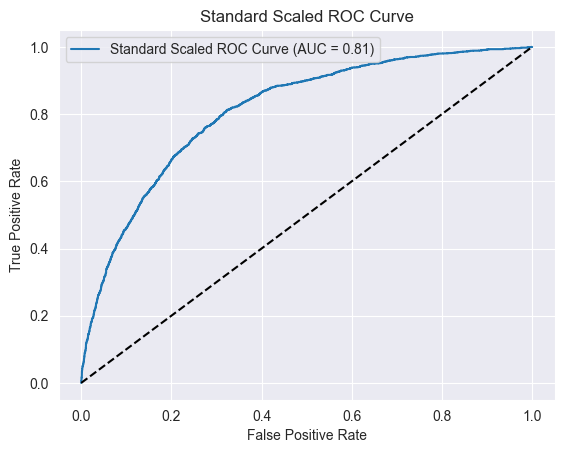

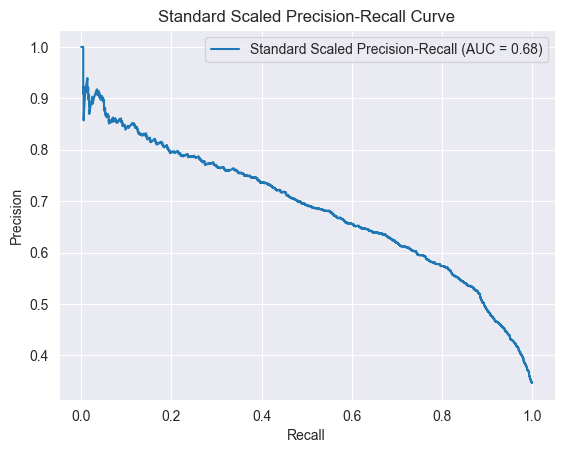

Confusion Matrix for Standard Scaled dataset:
[[3287  931]
 [ 690 1545]]
Overall Accuracy: 0.75
Top 10 Features for Standard Scaled dataset:
Total Account Balance    0.460156
DDA                      0.060996
SavBal                   0.052669
Checks                   0.048792
Teller                   0.044435
Sav                      0.038524
DirDep                   0.037383
Dep                      0.033440
CC                       0.033171
AcctAge                  0.029186
dtype: float64


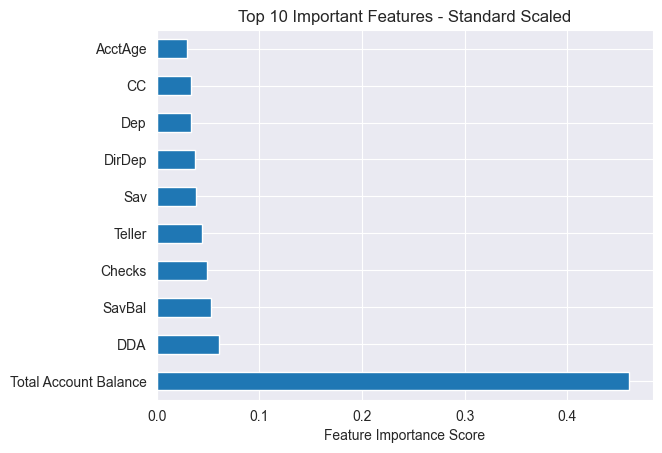

Processing dataset: Min-Max Scaled
Min-Max Scaled dataset AUC: 0.811

Classification Report for Min-Max Scaled dataset:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      4218
           1       0.62      0.71      0.66      2235

    accuracy                           0.75      6453
   macro avg       0.73      0.74      0.73      6453
weighted avg       0.76      0.75      0.75      6453



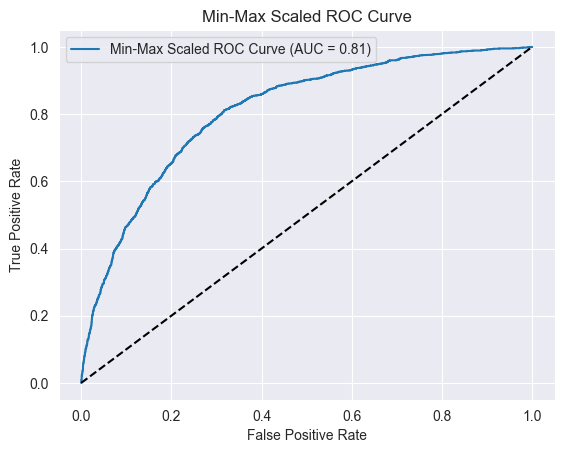

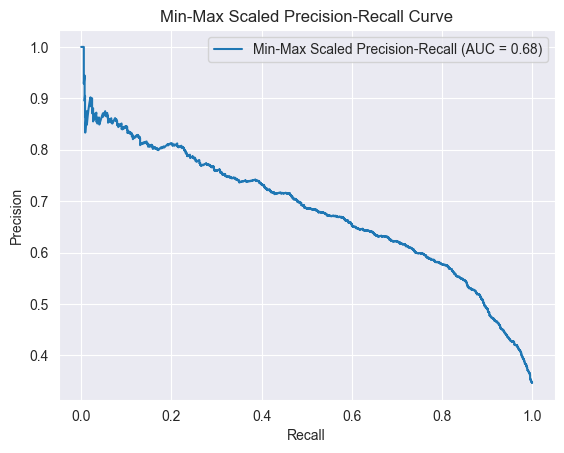

Confusion Matrix for Min-Max Scaled dataset:
[[3225  993]
 [ 640 1595]]
Overall Accuracy: 0.75
Top 10 Features for Min-Max Scaled dataset:
Total Account Balance    0.485332
Checks                   0.057900
Teller                   0.057421
Dep                      0.053211
DDA                      0.052324
SavBal                   0.046770
AcctAge                  0.028828
CDBal                    0.014728
Income to Loan Ratio     0.011738
Phone                    0.011264
dtype: float64


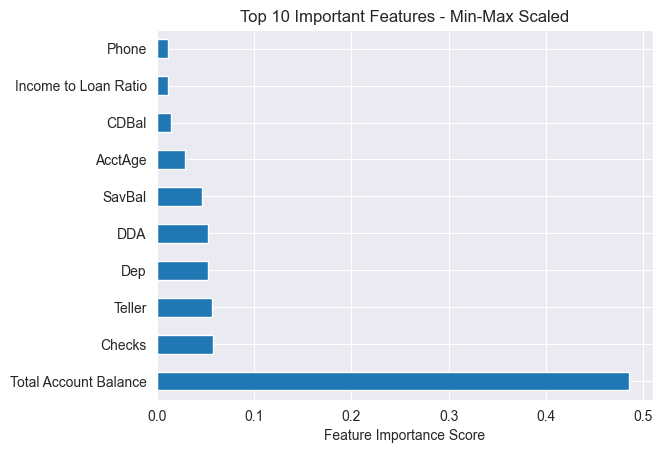

Processing dataset: Log Transformed
Log Transformed dataset AUC: 0.711

Classification Report for Log Transformed dataset:
               precision    recall  f1-score   support

           0       0.90      0.36      0.51      4218
           1       0.43      0.92      0.59      2235

    accuracy                           0.55      6453
   macro avg       0.66      0.64      0.55      6453
weighted avg       0.73      0.55      0.54      6453



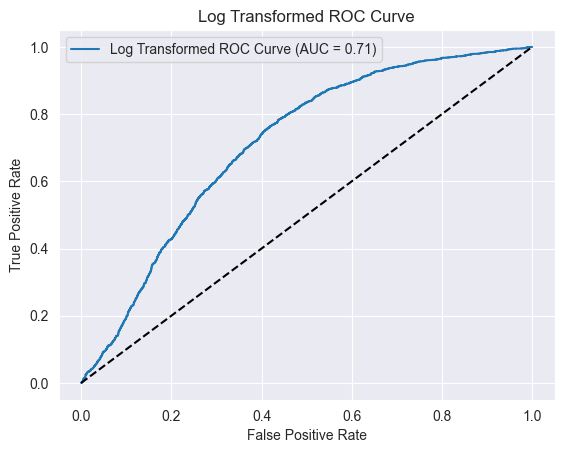

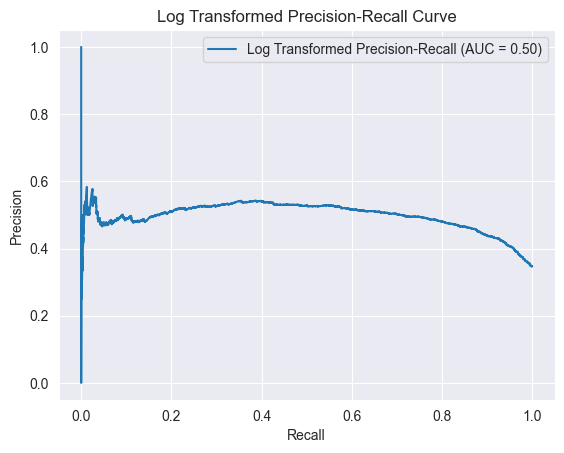

Confusion Matrix for Log Transformed dataset:
[[1503 2715]
 [ 176 2059]]
Overall Accuracy: 0.55
Top 10 Features for Log Transformed dataset:
Total Account Balance    0.506173
Dep                      0.077200
Teller                   0.067868
SavBal                   0.055208
Checks                   0.048563
AcctAge                  0.036477
DDABal                   0.024397
CDBal                    0.019603
Phone                    0.012555
LORes                    0.012016
dtype: float64


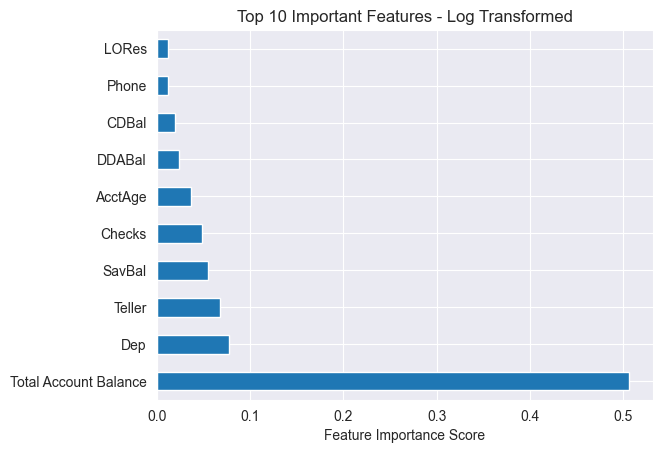

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Data Preparation and Feature Engineering

# Define the target variable and input features
X = data.drop(columns=[target])  # Input features
y = data[target]  # Target variable

# Step 1: Apply feature engineering to the dataset
def feature_engineering(df):
    df = df.copy()
    # Creating new ratio features
    df['ATM Withdrawal Ratio'] = df['ATMAmt'] / (df['DDABal'] + 1e-5)
    df['Credit Card Usage Ratio'] = df['CCPurc'] / (df['CCBal'] + 1e-5)
    df['Income to Loan Ratio'] = df['Income'] / (df['ILSBal'] + df['MTGBal'] + 1e-5)
    # Interaction terms
    df['Total Account Balance'] = df['DDABal'] + df['SavBal'] + df['MMBal'] + df['IRABal'] + df['InvBal'] + df['CDBal']
    df['Credit Usage Balance'] = df['CCBal'] + df['LOCBal']
    df['Total Deposits'] = df['DepAmt'] + df['POSAmt']
    return df

# Apply feature engineering to the whole dataset
X = feature_engineering(X)

# Step 2: Handle missing values in the entire dataset
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check for missing values after imputation
print("Missing values after imputation:\n", X.isnull().sum().sum())  # Should be 0

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Apply Data Transformations

# Define the different transformations
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Transformed datasets dictionary
datasets = {}

# Standard Scaled
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
datasets['Standard Scaled'] = (X_train_scaled, X_test_scaled)

# Min-Max Scaled
X_train_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_minmax = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns)
datasets['Min-Max Scaled'] = (X_train_minmax, X_test_minmax)

# Log Transformation Handling
# Adding 1 to avoid log(0), replacing negative values with the column median before log transformation
X_train_log = X_train.copy()
X_test_log = X_test.copy()

# Apply log transformation safely
def safe_log_transform(df):
    df = df.copy()
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x if x > 0 else np.nan)  # Replace negative values with NaN
        col_median = df[col].median()  # Compute median ignoring NaNs
        df[col] = df[col].fillna(col_median) + 1  # Fill NaNs and add 1 to avoid log(0)
    return log_transformer.fit_transform(df)

# Apply safe log transformation
X_train_log = pd.DataFrame(safe_log_transform(X_train_log), columns=X_train.columns)
X_test_log = pd.DataFrame(safe_log_transform(X_test_log), columns=X_test.columns)
datasets['Log Transformed'] = (X_train_log, X_test_log)

# 4. Apply SMOTE and Model Training

# Dictionary to store the results
results = {}

# Apply SMOTE to each transformed dataset and train models
smote = SMOTE(random_state=42)

for name, (X_train_transformed, X_test_transformed) in datasets.items():
    print(f"Processing dataset: {name}")
    
    # Apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)
    
    # Train the model
    model = GradientBoostingClassifier(random_state=42, **best_params)
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test_transformed)
    y_prob = model.predict_proba(X_test_transformed)[:, 1]
    
    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_prob)
    results[name] = {'model': model, 'auc': auc_score}  # Store model and AUC score
    print(f"{name} dataset AUC: {auc_score:.3f}")
    
    # Classification report
    print(f"\nClassification Report for {name} dataset:\n", classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} Precision-Recall (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name} dataset:\n{cm}")
    print(f"Overall Accuracy: {(cm[0,0] + cm[1,1]) / cm.sum():.2f}")
    
    # Feature Importances
    feature_importances = pd.Series(model.feature_importances_, index=X_train_transformed.columns)
    top_features = feature_importances.nlargest(10)  # Top 10 features
    print(f"Top 10 Features for {name} dataset:\n{top_features}")

    # Plotting Feature Importances
    top_features.plot(kind='barh')
    plt.xlabel('Feature Importance Score')
    plt.title(f'Top 10 Important Features - {name}')
    plt.show()

## Part 6: SHAP for Feature Importance (Best Model)


Best Model: Standard Scaled


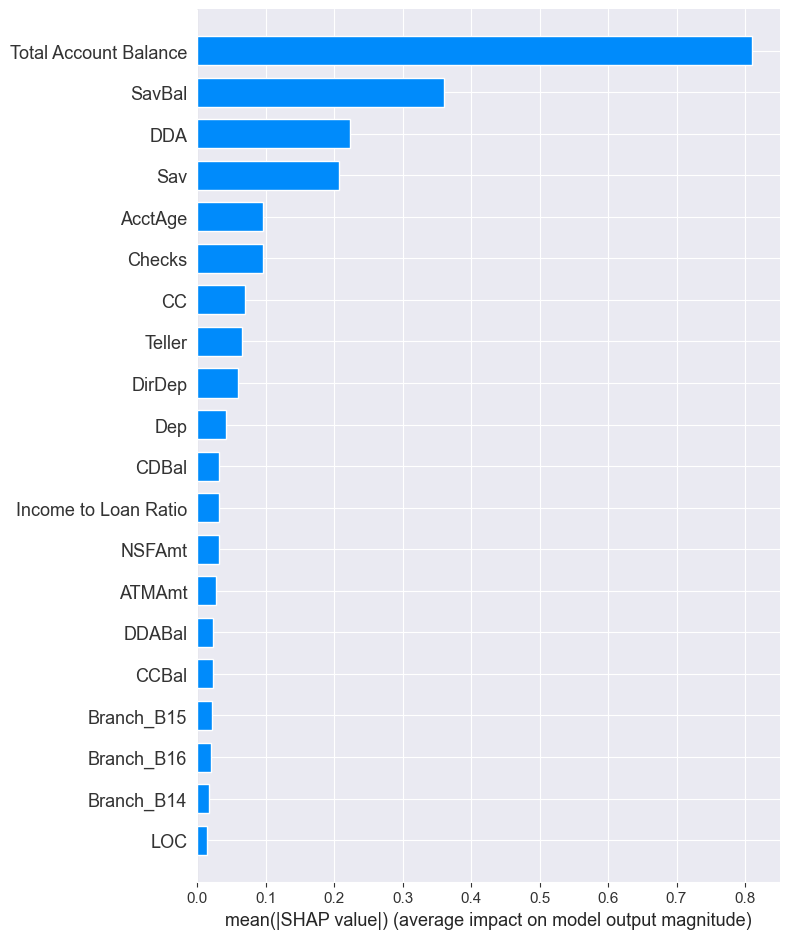

ValueError: Could not find feature named: feature_name

In [56]:
# Import SHAP library
import shap

# Identify the best performing model based on AUC
best_model_name = max(results, key=lambda k: results[k]['auc'])
best_model = results[best_model_name]['model']  # Extract the best model
print(f"\nBest Model: {best_model_name}")

# Select the appropriate transformed dataset
X_train_shap, X_test_shap = datasets[best_model_name]

# Ensure feature names match
assert X_train_shap.shape[1] == best_model.n_features_in_, "Feature count mismatch!"

# Calculate SHAP values for the best model using TreeExplainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_shap)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_shap, plot_type="bar")

# Plot SHAP dependence for a specific feature
shap.dependence_plot("feature_name", shap_values, X_test_shap)  # Replace "feature_name" with an actual feature name